# Подключение библиотек

!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install openpyxl xlsxwriter xlrd

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras import backend as K

# Загрузка данных

In [2]:
df_bp = pd.read_excel('Datasets/X_bp.xlsx', index_col=0)
df_bp.head(5)

Matrix_filler_ratio  Matter_density, kg/m3  Elastic_modulus, GPa  \
0             1.857143                 2030.0            738.736842   
1             1.857143                 2030.0            738.736842   
2             1.857143                 2030.0            738.736842   
3             1.857143                 2030.0            738.736842   
4             2.771331                 2030.0            753.000000   

   Сuring_agent, m.%  Epoxy_Group_Content, %  Flash_point, °C  \
0              30.00               22.267857       100.000000   
1              50.00               23.750000       284.615385   
2              49.90               33.000000       284.615385   
3             129.00               21.250000       300.000000   
4             111.86               22.267857       284.615385   

   Surface_density, g/m2  Elastic_module_tension, Gpa  Tensile_strength., Mpa  \
0                  210.0                         70.0                  3000.0   
1                  210.0                         70.0                  3000.0   
2                  210.0                         70.0                  3000.0   
3                  210.0                         70.0                  3000.0   
4                  210.0                         70.0                  3000.0   

   Resin_content, g/m2  
0                220.0  
1                220.0  
2                220.0  
3                220.0  
4                220.0

In [3]:
df_nup = pd.read_excel('Datasets/X_nup.xlsx', index_col=0)
df_nup.head(5)

Patch_angle  Patch_step  Patch_density
0            0         4.0           57.0
1            0         4.0           60.0
2            0         4.0           70.0
3            0         5.0           47.0
4            0         5.0           57.0

# Подготовка датасета

In [4]:
df = df_bp.merge(df_nup, left_index = True, right_index = True, how = 'inner')
df.head(5)

Matrix_filler_ratio  Matter_density, kg/m3  Elastic_modulus, GPa  \
0             1.857143                 2030.0            738.736842   
1             1.857143                 2030.0            738.736842   
2             1.857143                 2030.0            738.736842   
3             1.857143                 2030.0            738.736842   
4             2.771331                 2030.0            753.000000   

   Сuring_agent, m.%  Epoxy_Group_Content, %  Flash_point, °C  \
0              30.00               22.267857       100.000000   
1              50.00               23.750000       284.615385   
2              49.90               33.000000       284.615385   
3             129.00               21.250000       300.000000   
4             111.86               22.267857       284.615385   

   Surface_density, g/m2  Elastic_module_tension, Gpa  Tensile_strength., Mpa  \
0                  210.0                         70.0                  3000.0   
1                  210.0                         70.0                  3000.0   
2                  210.0                         70.0                  3000.0   
3                  210.0                         70.0                  3000.0   
4                  210.0                         70.0                  3000.0   

   Resin_content, g/m2  Patch_angle  Patch_step  Patch_density  
0                220.0            0         4.0           57.0  
1                220.0            0         4.0           60.0  
2                220.0            0         4.0           70.0  
3                220.0            0         5.0           47.0  
4                220.0            0         5.0           57.0

In [5]:
df.shape

(1023, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Matrix_filler_ratio          1023 non-null   float64
 1   Matter_density, kg/m3        1023 non-null   float64
 2   Elastic_modulus, GPa         1023 non-null   float64
 3   Сuring_agent, m.%            1023 non-null   float64
 4   Epoxy_Group_Content, %       1023 non-null   float64
 5   Flash_point, °C              1023 non-null   float64
 6   Surface_density, g/m2        1023 non-null   float64
 7   Elastic_module_tension, Gpa  1023 non-null   float64
 8   Tensile_strength., Mpa       1023 non-null   float64
 9   Resin_content, g/m2          1023 non-null   float64
 10  Patch_angle                  1023 non-null   int64  
 11  Patch_step                   1023 non-null   float64
 12  Patch_density                1023 non-null   float64
dtypes: float64(12), in

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

count         mean         std          min  \
Matrix_filler_ratio          1023.0     2.930366    0.913222     0.389403   
Matter_density, kg/m3        1023.0  1975.734888   73.729231  1731.764635   
Elastic_modulus, GPa         1023.0   739.923233  330.231581     2.436909   
Сuring_agent, m.%            1023.0   110.570769   28.295911    17.740275   
Epoxy_Group_Content, %       1023.0    22.244390    2.406301    14.254985   
Flash_point, °C              1023.0   285.882151   40.943260   100.000000   
Surface_density, g/m2        1023.0   482.731833  281.314690     0.603740   
Elastic_module_tension, Gpa  1023.0    73.328571    3.118983    64.054061   
Tensile_strength., Mpa       1023.0  2466.922843  485.628006  1036.856605   
Resin_content, g/m2          1023.0   218.423144   59.735931    33.803026   
Patch_angle                  1023.0    44.252199   45.015793     0.000000   
Patch_step                   1023.0     6.899222    2.563467     0.000000   
Patch_density                1023.0    57.153929   12.350969     0.000000   

                                     25%          50%          75%  \
Matrix_filler_ratio             2.317887     2.906878     3.552660   
Matter_density, kg/m3        1924.155467  1977.621657  2021.374375   
Elastic_modulus, GPa          500.047452   739.664328   961.812526   
Сuring_agent, m.%              92.443497   110.564840   129.730366   
Epoxy_Group_Content, %         20.608034    22.230744    23.961934   
Flash_point, °C               259.066528   285.896812   313.002106   
Surface_density, g/m2         266.816645   451.864365   693.225017   
Elastic_module_tension, Gpa    71.245018    73.268805    75.356612   
Tensile_strength., Mpa       2135.850448  2459.524526  2767.193119   
Resin_content, g/m2           179.627520   219.198882   257.481724   
Patch_angle                     0.000000     0.000000    90.000000   
Patch_step                      5.080033     6.916144     8.586293   
Patch_density                  49.799212    57.341920    64.944961   

                                     max  
Matrix_filler_ratio             5.591742  
Matter_density, kg/m3        2207.773481  
Elastic_modulus, GPa         1911.536477  
Сuring_agent, m.%             198.953207  
Epoxy_Group_Content, %         33.000000  
Flash_point, °C               413.273418  
Surface_density, g/m2        1399.542362  
Elastic_module_tension, Gpa    82.682051  
Tensile_strength., Mpa       3848.436732  
Resin_content, g/m2           414.590628  
Patch_angle                    90.000000  
Patch_step                     14.440522  
Patch_density                 103.988901

**Реализовали объединение двух таблиц с данными по индексу, тип объединения INNER. 
Ознакомились с краткой описательной статистикой. Проверили данные на наличие дубликатов и пропусков. Дубликаты и пропуски отсутствуют.**

# Разведочный анализ

In [9]:
df.columns

Index(['Matrix_filler_ratio', 'Matter_density, kg/m3', 'Elastic_modulus, GPa',
       'Сuring_agent, m.%', 'Epoxy_Group_Content, %', 'Flash_point, °C',
       'Surface_density, g/m2', 'Elastic_module_tension, Gpa',
       'Tensile_strength., Mpa', 'Resin_content, g/m2', 'Patch_angle',
       'Patch_step', 'Patch_density'],
      dtype='object')

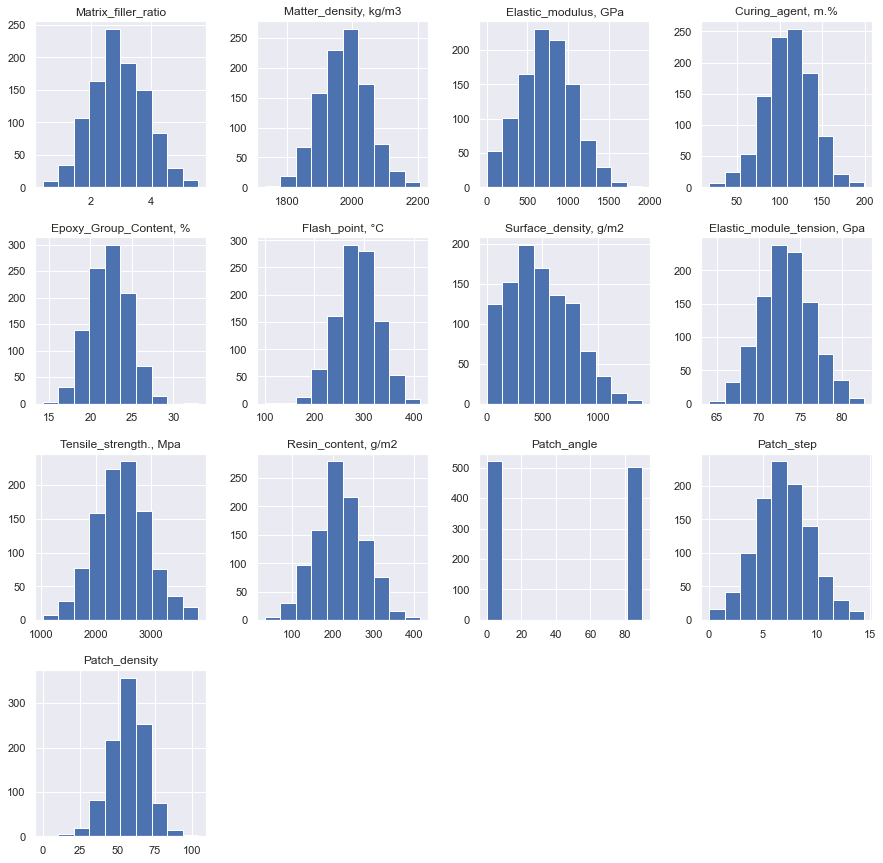

In [10]:
sns.set()
df.hist(figsize = (15, 15))
plt.show()

**Гистограммы свидетельствуют о нормальном распределении вероятностей всех переменных, кроме  переменной "Угол нашивки"**

In [11]:
corr = df.corr().round(2)
corr

Matrix_filler_ratio  Matter_density, kg/m3  \
Matrix_filler_ratio                         1.00                   0.00   
Matter_density, kg/m3                       0.00                   1.00   
Elastic_modulus, GPa                        0.03                  -0.01   
Сuring_agent, m.%                          -0.01                  -0.04   
Epoxy_Group_Content, %                      0.02                  -0.01   
Flash_point, °C                            -0.00                  -0.02   
Surface_density, g/m2                      -0.01                   0.04   
Elastic_module_tension, Gpa                -0.01                  -0.02   
Tensile_strength., Mpa                      0.02                  -0.07   
Resin_content, g/m2                         0.07                  -0.02   
Patch_angle                                -0.03                  -0.07   
Patch_step                                  0.04                  -0.06   
Patch_density                              -0.00                   0.08   

                             Elastic_modulus, GPa  Сuring_agent, m.%  \
Matrix_filler_ratio                          0.03              -0.01   
Matter_density, kg/m3                       -0.01              -0.04   
Elastic_modulus, GPa                         1.00               0.02   
Сuring_agent, m.%                            0.02               1.00   
Epoxy_Group_Content, %                      -0.01              -0.00   
Flash_point, °C                              0.03               0.10   
Surface_density, g/m2                       -0.01               0.06   
Elastic_module_tension, Gpa                  0.02              -0.07   
Tensile_strength., Mpa                       0.04              -0.08   
Resin_content, g/m2                          0.00               0.01   
Patch_angle                                 -0.03               0.04   
Patch_step                                  -0.01               0.01   
Patch_density                                0.06               0.02   

                             Epoxy_Group_Content, %  Flash_point, °C  \
Matrix_filler_ratio                            0.02            -0.00   
Matter_density, kg/m3                         -0.01            -0.02   
Elastic_modulus, GPa                          -0.01             0.03   
Сuring_agent, m.%                             -0.00             0.10   
Epoxy_Group_Content, %                         1.00            -0.01   
Flash_point, °C                               -0.01             1.00   
Surface_density, g/m2                         -0.01             0.02   
Elastic_module_tension, Gpa                    0.06             0.03   
Tensile_strength., Mpa                        -0.02            -0.03   
Resin_content, g/m2                            0.02             0.06   
Patch_angle                                    0.01             0.02   
Patch_step                                     0.00             0.03   
Patch_density                                 -0.04             0.01   

                             Surface_density, g/m2  \
Matrix_filler_ratio                          -0.01   
Matter_density, kg/m3                         0.04   
Elastic_modulus, GPa                         -0.01   
Сuring_agent, m.%                             0.06   
Epoxy_Group_Content, %                       -0.01   
Flash_point, °C                               0.02   
Surface_density, g/m2                         1.00   
Elastic_module_tension, Gpa                   0.04   
Tensile_strength., Mpa                       -0.00   
Resin_content, g/m2                           0.02   
Patch_angle                                   0.05   
Patch_step                                    0.04   
Patch_density                                -0.05   

                             Elastic_module_tension, Gpa  \
Matrix_filler_ratio                                -0.01   
Matter_density, kg/m3                              -0.02   
Elastic_modulus, GPa   

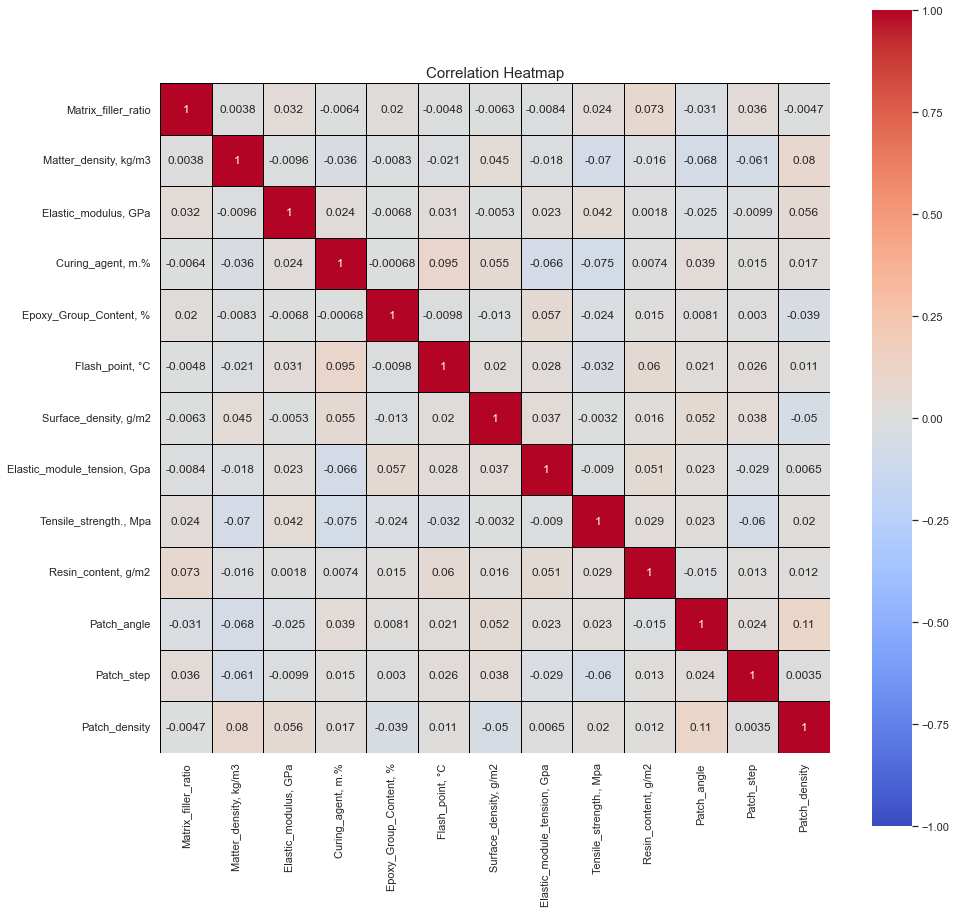

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, center= 0, square=True, annot=True, linewidths=1, linecolor='black')
plt.title("Correlation Heatmap", fontsize = 15)
plt.show()

**Коэффициенты корреляции и тепловая карта говорят об отсутствии линейной зависимости переменых**

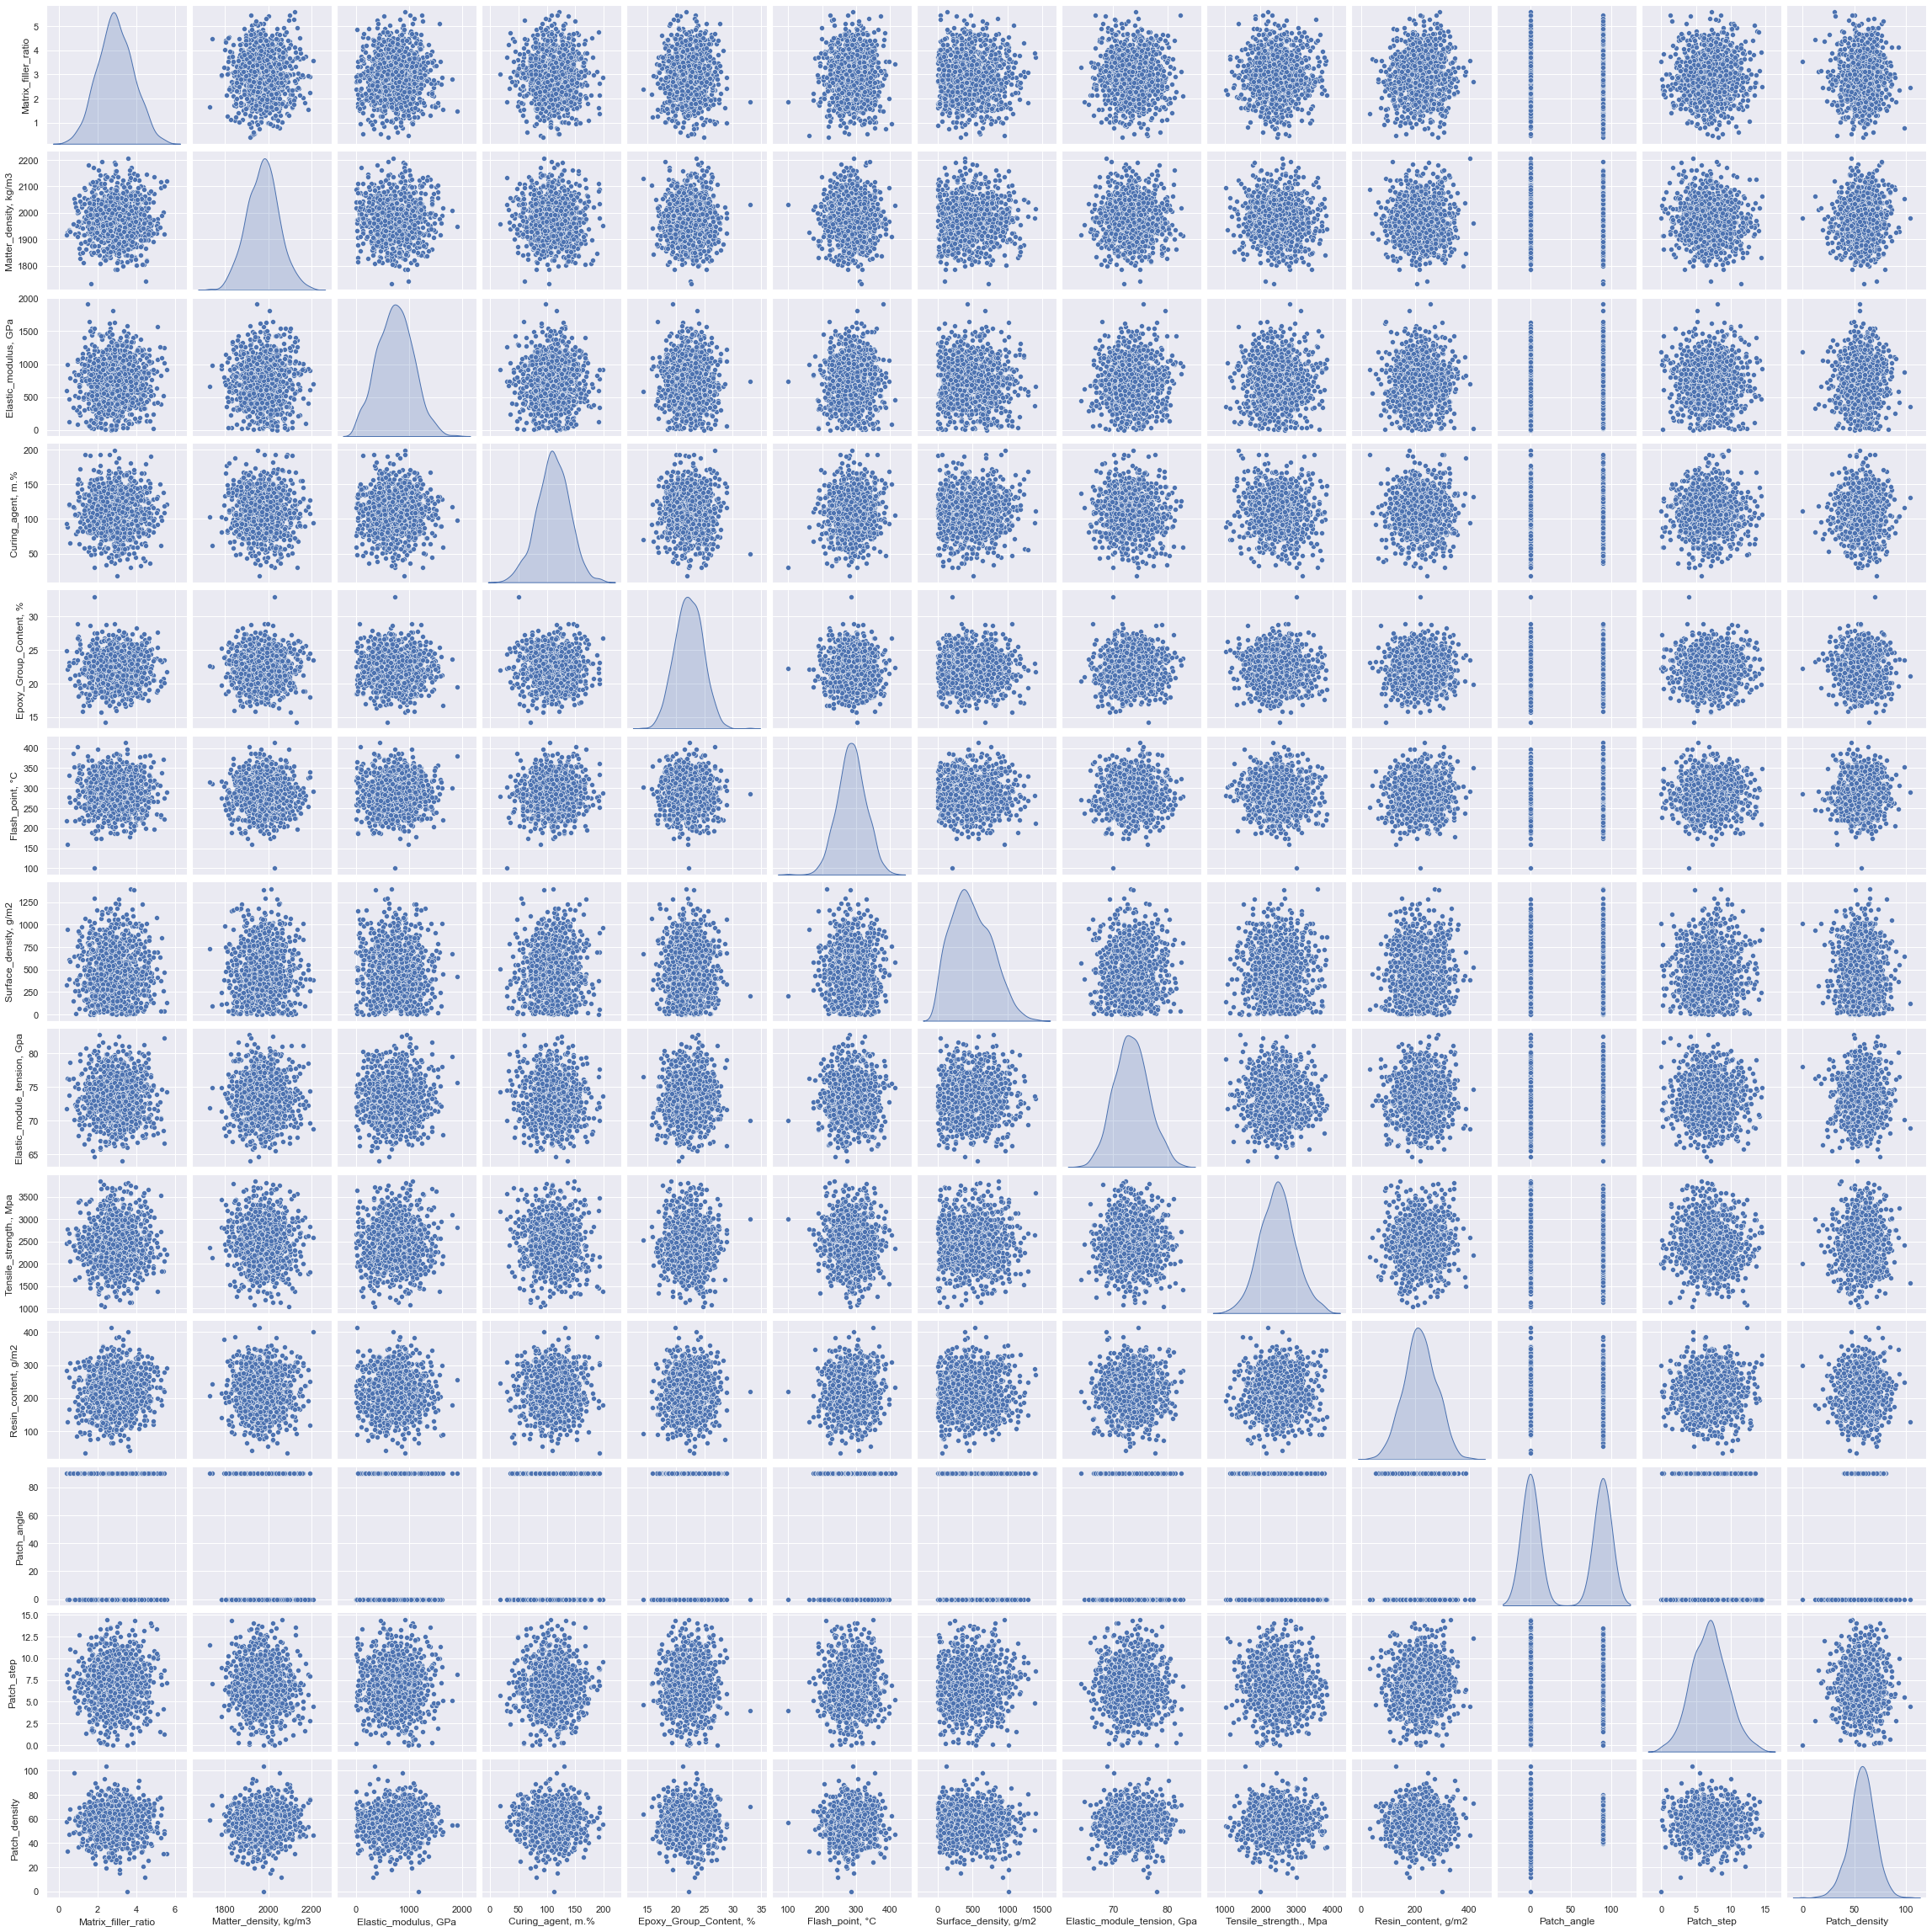

In [13]:
sns.pairplot(df, diag_kind='kde')

**По графикам рассеивания очевидной явной зависимости между переменными нет**

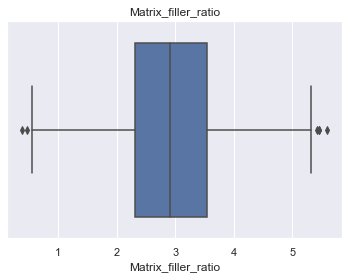

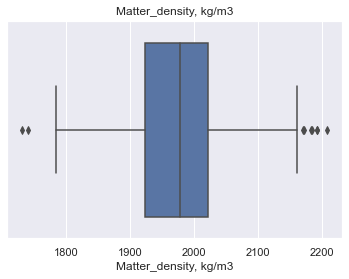

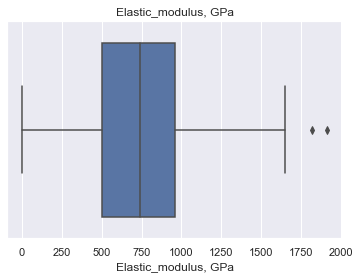

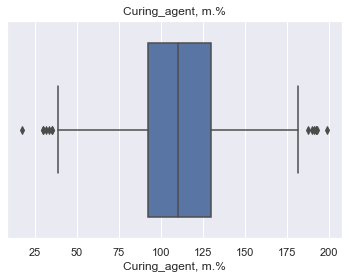

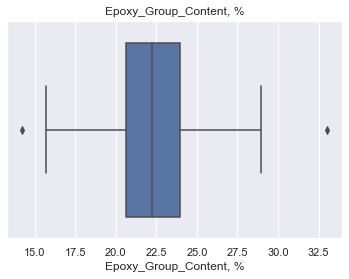

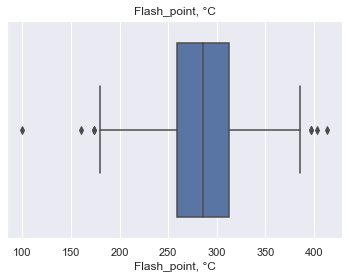

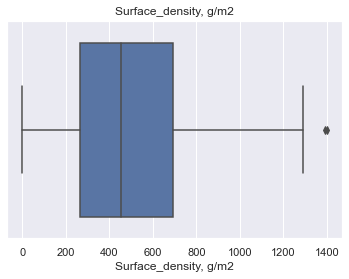

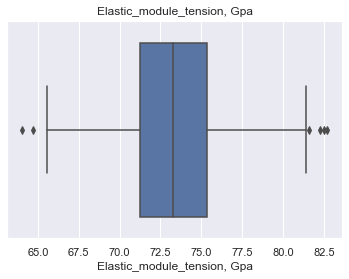

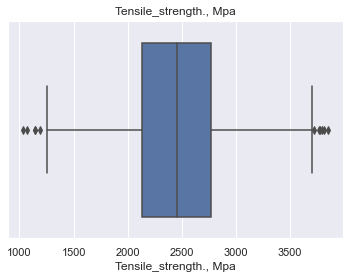

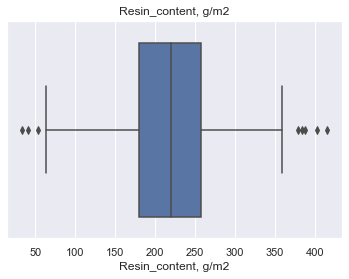

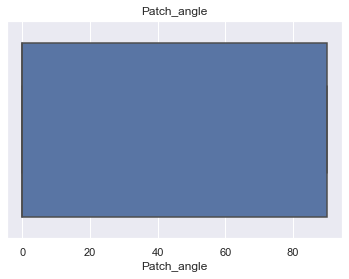

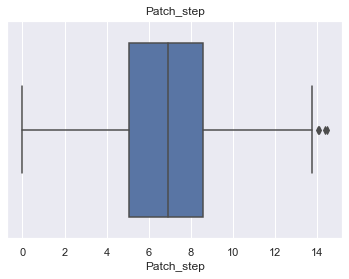

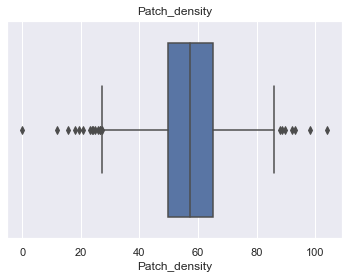

In [14]:
for col in df.columns:   
    sns.boxplot(x = col, data = df)
    plt.title(col)
    plt.show()

# Удаление выбросов, пропусков, нормализация

In [19]:
#сделаем копию, оставим изначальный датасет без изменений
df_copy = df.copy(deep = True)

In [20]:
df_copy.columns

Index(['Matrix_filler_ratio', 'Matter_density, kg/m3', 'Elastic_modulus, GPa',
       'Сuring_agent, m.%', 'Epoxy_Group_Content, %', 'Flash_point, °C',
       'Surface_density, g/m2', 'Elastic_module_tension, Gpa',
       'Tensile_strength., Mpa', 'Resin_content, g/m2', 'Patch_angle',
       'Patch_step', 'Patch_density'],
      dtype='object')

In [21]:
#заменим выбросы на пустые значения
for x in df_copy:
    q3,q1 = np.percentile(df_copy.loc[:,x],[75,25])
    IQR = q3-q1
    max = q3+(1.5*IQR)
    min = q1-(1.5*IQR)
    df.loc[df[x]<min,x] = np.nan
    df.loc[df[x]>max,x] = np.nan

In [22]:
#количество выбросов по столбцам
df_copy.isnull().sum()

Matrix_filler_ratio             6
Matter_density, kg/m3           9
Elastic_modulus, GPa            2
Сuring_agent, m.%              14
Epoxy_Group_Content, %          2
Flash_point, °C                 8
Surface_density, g/m2           2
Elastic_module_tension, Gpa     6
Tensile_strength., Mpa         11
Resin_content, g/m2             8
Patch_angle                     0
Patch_step                      4
Patch_density                  21
dtype: int64

In [23]:
#общее количество выбросов
df_copy.isnull().sum().sum()

93

In [24]:
#удаляем выбросы
df_copy = df_copy.dropna(axis=0)
#проверяем наличие пустых значений после удаления
df_copy.isnull().sum()

Matrix_filler_ratio            0
Matter_density, kg/m3          0
Elastic_modulus, GPa           0
Сuring_agent, m.%              0
Epoxy_Group_Content, %         0
Flash_point, °C                0
Surface_density, g/m2          0
Elastic_module_tension, Gpa    0
Tensile_strength., Mpa         0
Resin_content, g/m2            0
Patch_angle                    0
Patch_step                     0
Patch_density                  0
dtype: int64

In [25]:
df_copy.shape

(936, 13)

In [26]:
df_copy.describe().T

count         mean         std          min  \
Matrix_filler_ratio          936.0     2.925683    0.893712     0.547391   
Matter_density, kg/m3        936.0  1974.040023   70.808120  1784.482245   
Elastic_modulus, GPa         936.0   738.247627  328.708665     2.436909   
Сuring_agent, m.%            936.0   110.916216   27.037891    38.668500   
Epoxy_Group_Content, %       936.0    22.209030    2.394871    15.695894   
Flash_point, °C              936.0   286.040414   39.400677   179.374391   
Surface_density, g/m2        936.0   482.993901  280.190377     0.603740   
Elastic_module_tension, Gpa  936.0    73.305127    3.037381    65.553336   
Tensile_strength., Mpa       936.0  2467.488822  463.838911  1250.392802   
Resin_content, g/m2          936.0   217.613374   57.827255    63.685698   
Patch_angle                  936.0    46.057692   45.011619     0.000000   
Patch_step                   936.0     6.915585    2.509672     0.037639   
Patch_density                936.0    57.451895   11.239331    27.272928   

                                     25%          50%          75%  \
Matrix_filler_ratio             2.321931     2.904731     3.546650   
Matter_density, kg/m3        1923.443748  1977.258043  2020.158764   
Elastic_modulus, GPa          498.577158   738.736842   958.418993   
Сuring_agent, m.%              92.523816   111.113175   130.001450   
Epoxy_Group_Content, %         20.571516    22.184713    23.961818   
Flash_point, °C               259.184486   286.024118   312.991425   
Surface_density, g/m2         266.004099   457.732246   695.900862   
Elastic_module_tension, Gpa    71.248823    73.259230    75.310788   
Tensile_strength., Mpa       2146.936034  2457.959767  2755.169485   
Resin_content, g/m2           179.489091   218.388715   256.396777   
Patch_angle                     0.000000    90.000000    90.000000   
Patch_step                      5.134988     6.943337     8.591450   
Patch_density                  50.209656    57.584225    64.798211   

                                     max  
Matrix_filler_ratio             5.314144  
Matter_density, kg/m3        2161.565216  
Elastic_modulus, GPa         1649.415706  
Сuring_agent, m.%             181.828448  
Epoxy_Group_Content, %         28.955094  
Flash_point, °C               386.067992  
Surface_density, g/m2        1291.340115  
Elastic_module_tension, Gpa    81.417126  
Tensile_strength., Mpa       3705.672523  
Resin_content, g/m2           359.052220  
Patch_angle                    90.000000  
Patch_step                     13.732404  
Patch_density                  86.012427

In [27]:
min_max_scaler = preprocessing.MinMaxScaler()
scaling = min_max_scaler.fit_transform(df_copy)
df_minmax = pd.DataFrame(scaling, columns = list(df_copy.columns))
df_minmax

Matrix_filler_ratio  Matter_density, kg/m3  Elastic_modulus, GPa  \
0               0.274768               0.651097              0.447061   
1               0.274768               0.651097              0.447061   
2               0.466552               0.651097              0.455721   
3               0.465836               0.571539              0.452685   
4               0.424236               0.332865              0.488508   
..                   ...                    ...                   ...   
931             0.361662               0.444480              0.552781   
932             0.607674               0.704373              0.268550   
933             0.573391               0.498274              0.251612   
934             0.662497               0.748688              0.448724   
935             0.684036               0.280923              0.251903   

     Сuring_agent, m.%  Epoxy_Group_Content, %  Flash_point, °C  \
0             0.079153                0.607435         0.509164   
1             0.630983                0.418887         0.583596   
2             0.511257                0.495653         0.509164   
3             0.511257                0.495653         0.509164   
4             0.511257                0.495653         0.509164   
..                 ...                     ...              ...   
931           0.337550                0.333908         0.703458   
932           0.749605                0.294428         0.362087   
933           0.501991                0.623085         0.334063   
934           0.717585                0.267818         0.466417   
935           0.632264                0.888354         0.588206   

     Surface_density, g/m2  Elastic_module_tension, Gpa  \
0                 0.162230                     0.280303   
1                 0.162230                     0.280303   
2                 0.162230                     0.280303   
3                 0.162230                     0.280303   
4                 0.162230                     0.280303   
..                     ...                          ...   
931               0.161609                     0.475147   
932               0.271207                     0.464422   
933               0.572959                     0.578740   
934               0.496511                     0.535142   
935               0.587373                     0.551972   

     Tensile_strength., Mpa  Resin_content, g/m2  Patch_angle  Patch_step  \
0                  0.712590             0.529221          0.0    0.289334   
1                  0.712590             0.529221          0.0    0.362355   
2                  0.712590             0.529221          0.0    0.362355   
3                  0.712590             0.529221          0.0    0.362355   
4                  0.712590             0.529221          0.0    0.362355   
..                      ...                  ...          ...         ...   
931                0.463043             0.207613          1.0    0.660014   
932                0.452087             0.182974          1.0    0.768759   
933                0.575296             0.585446          1.0    0.301102   
934                0.334513             0.451779          1.0    0.458245   
935                0.654075             0.443749          1.0    0.441137   

     Patch_density  
0         0.557156  
1         0.335840  
2         0.506083  
3         0.557156  
4         0.727399  
..             ...  
931       0.336177  
932       0.450768  
933       0.687046  
934       0.527552  
935       0.853966  

[936 rows x 13 columns]

In [28]:
df_minmax.shape

(936, 13)

In [29]:
df_minmax.describe().T

count      mean       std  min       25%  \
Matrix_filler_ratio          936.0  0.498933  0.187489  0.0  0.372274   
Matter_density, kg/m3        936.0  0.502695  0.187779  0.0  0.368517   
Elastic_modulus, GPa         936.0  0.446764  0.199583  0.0  0.301243   
Сuring_agent, m.%            936.0  0.504664  0.188865  0.0  0.376190   
Epoxy_Group_Content, %       936.0  0.491216  0.180620  0.0  0.367716   
Flash_point, °C              936.0  0.516059  0.190624  0.0  0.386128   
Surface_density, g/m2        936.0  0.373733  0.217078  0.0  0.205619   
Elastic_module_tension, Gpa  936.0  0.488647  0.191466  0.0  0.359024   
Tensile_strength., Mpa       936.0  0.495706  0.188915  0.0  0.365149   
Resin_content, g/m2          936.0  0.521141  0.195781  0.0  0.392067   
Patch_angle                  936.0  0.511752  0.500129  0.0  0.000000   
Patch_step                   936.0  0.502232  0.183258  0.0  0.372211   
Patch_density                936.0  0.513776  0.191342  0.0  0.390482   

                                  50%       75%  max  
Matrix_filler_ratio          0.494538  0.629204  1.0  
Matter_density, kg/m3        0.511229  0.624999  1.0  
Elastic_modulus, GPa         0.447061  0.580446  1.0  
Сuring_agent, m.%            0.506040  0.637978  1.0  
Epoxy_Group_Content, %       0.489382  0.623410  1.0  
Flash_point, °C              0.515980  0.646450  1.0  
Surface_density, g/m2        0.354161  0.538683  1.0  
Elastic_module_tension, Gpa  0.485754  0.615077  1.0  
Tensile_strength., Mpa       0.491825  0.612874  1.0  
Resin_content, g/m2          0.523766  0.652447  1.0  
Patch_angle                  1.000000  1.000000  1.0  
Patch_step                   0.504258  0.624604  1.0  
Patch_density                0.516029  0.638842  1.0

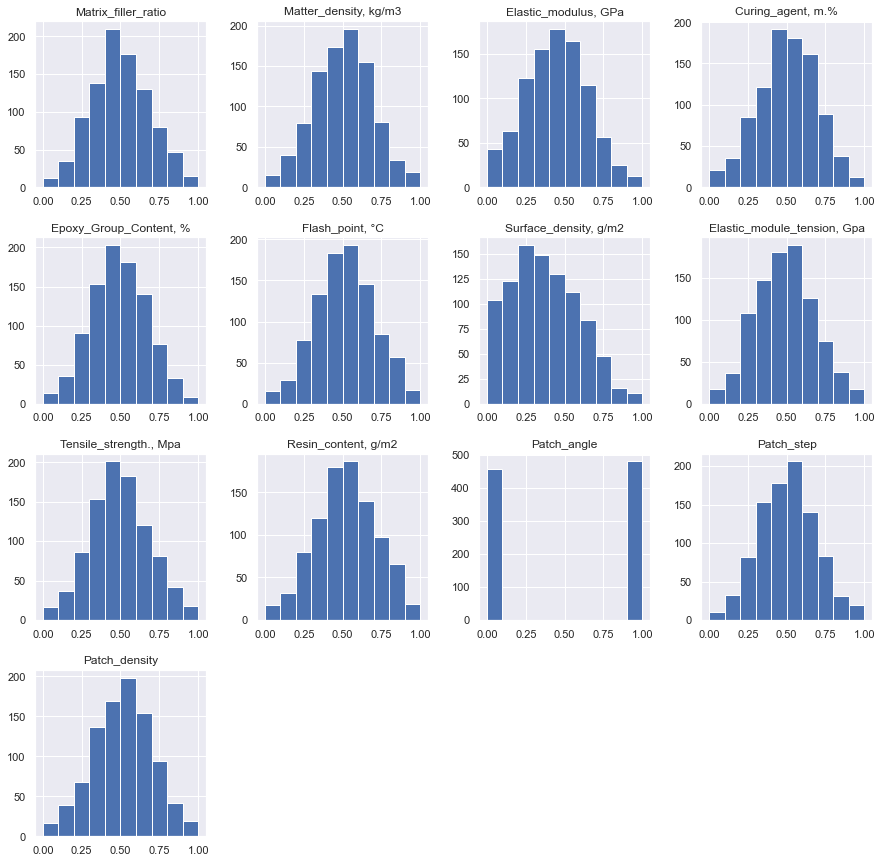

In [30]:
df_minmax.hist(figsize = (15, 15))
plt.show()

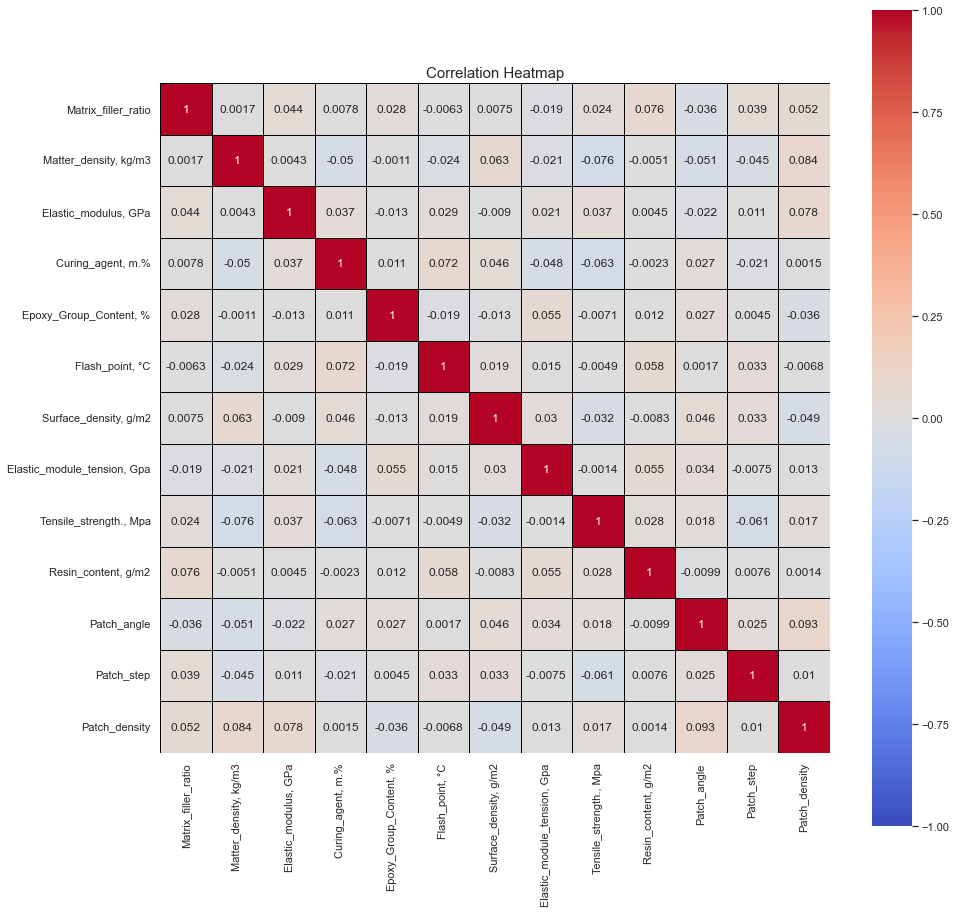

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(df_minmax.corr(), cmap='coolwarm', vmin=-1, vmax=1, center= 0, square=True, annot=True, linewidths=1, linecolor='black')
plt.title("Correlation Heatmap", fontsize = 15)
plt.show()

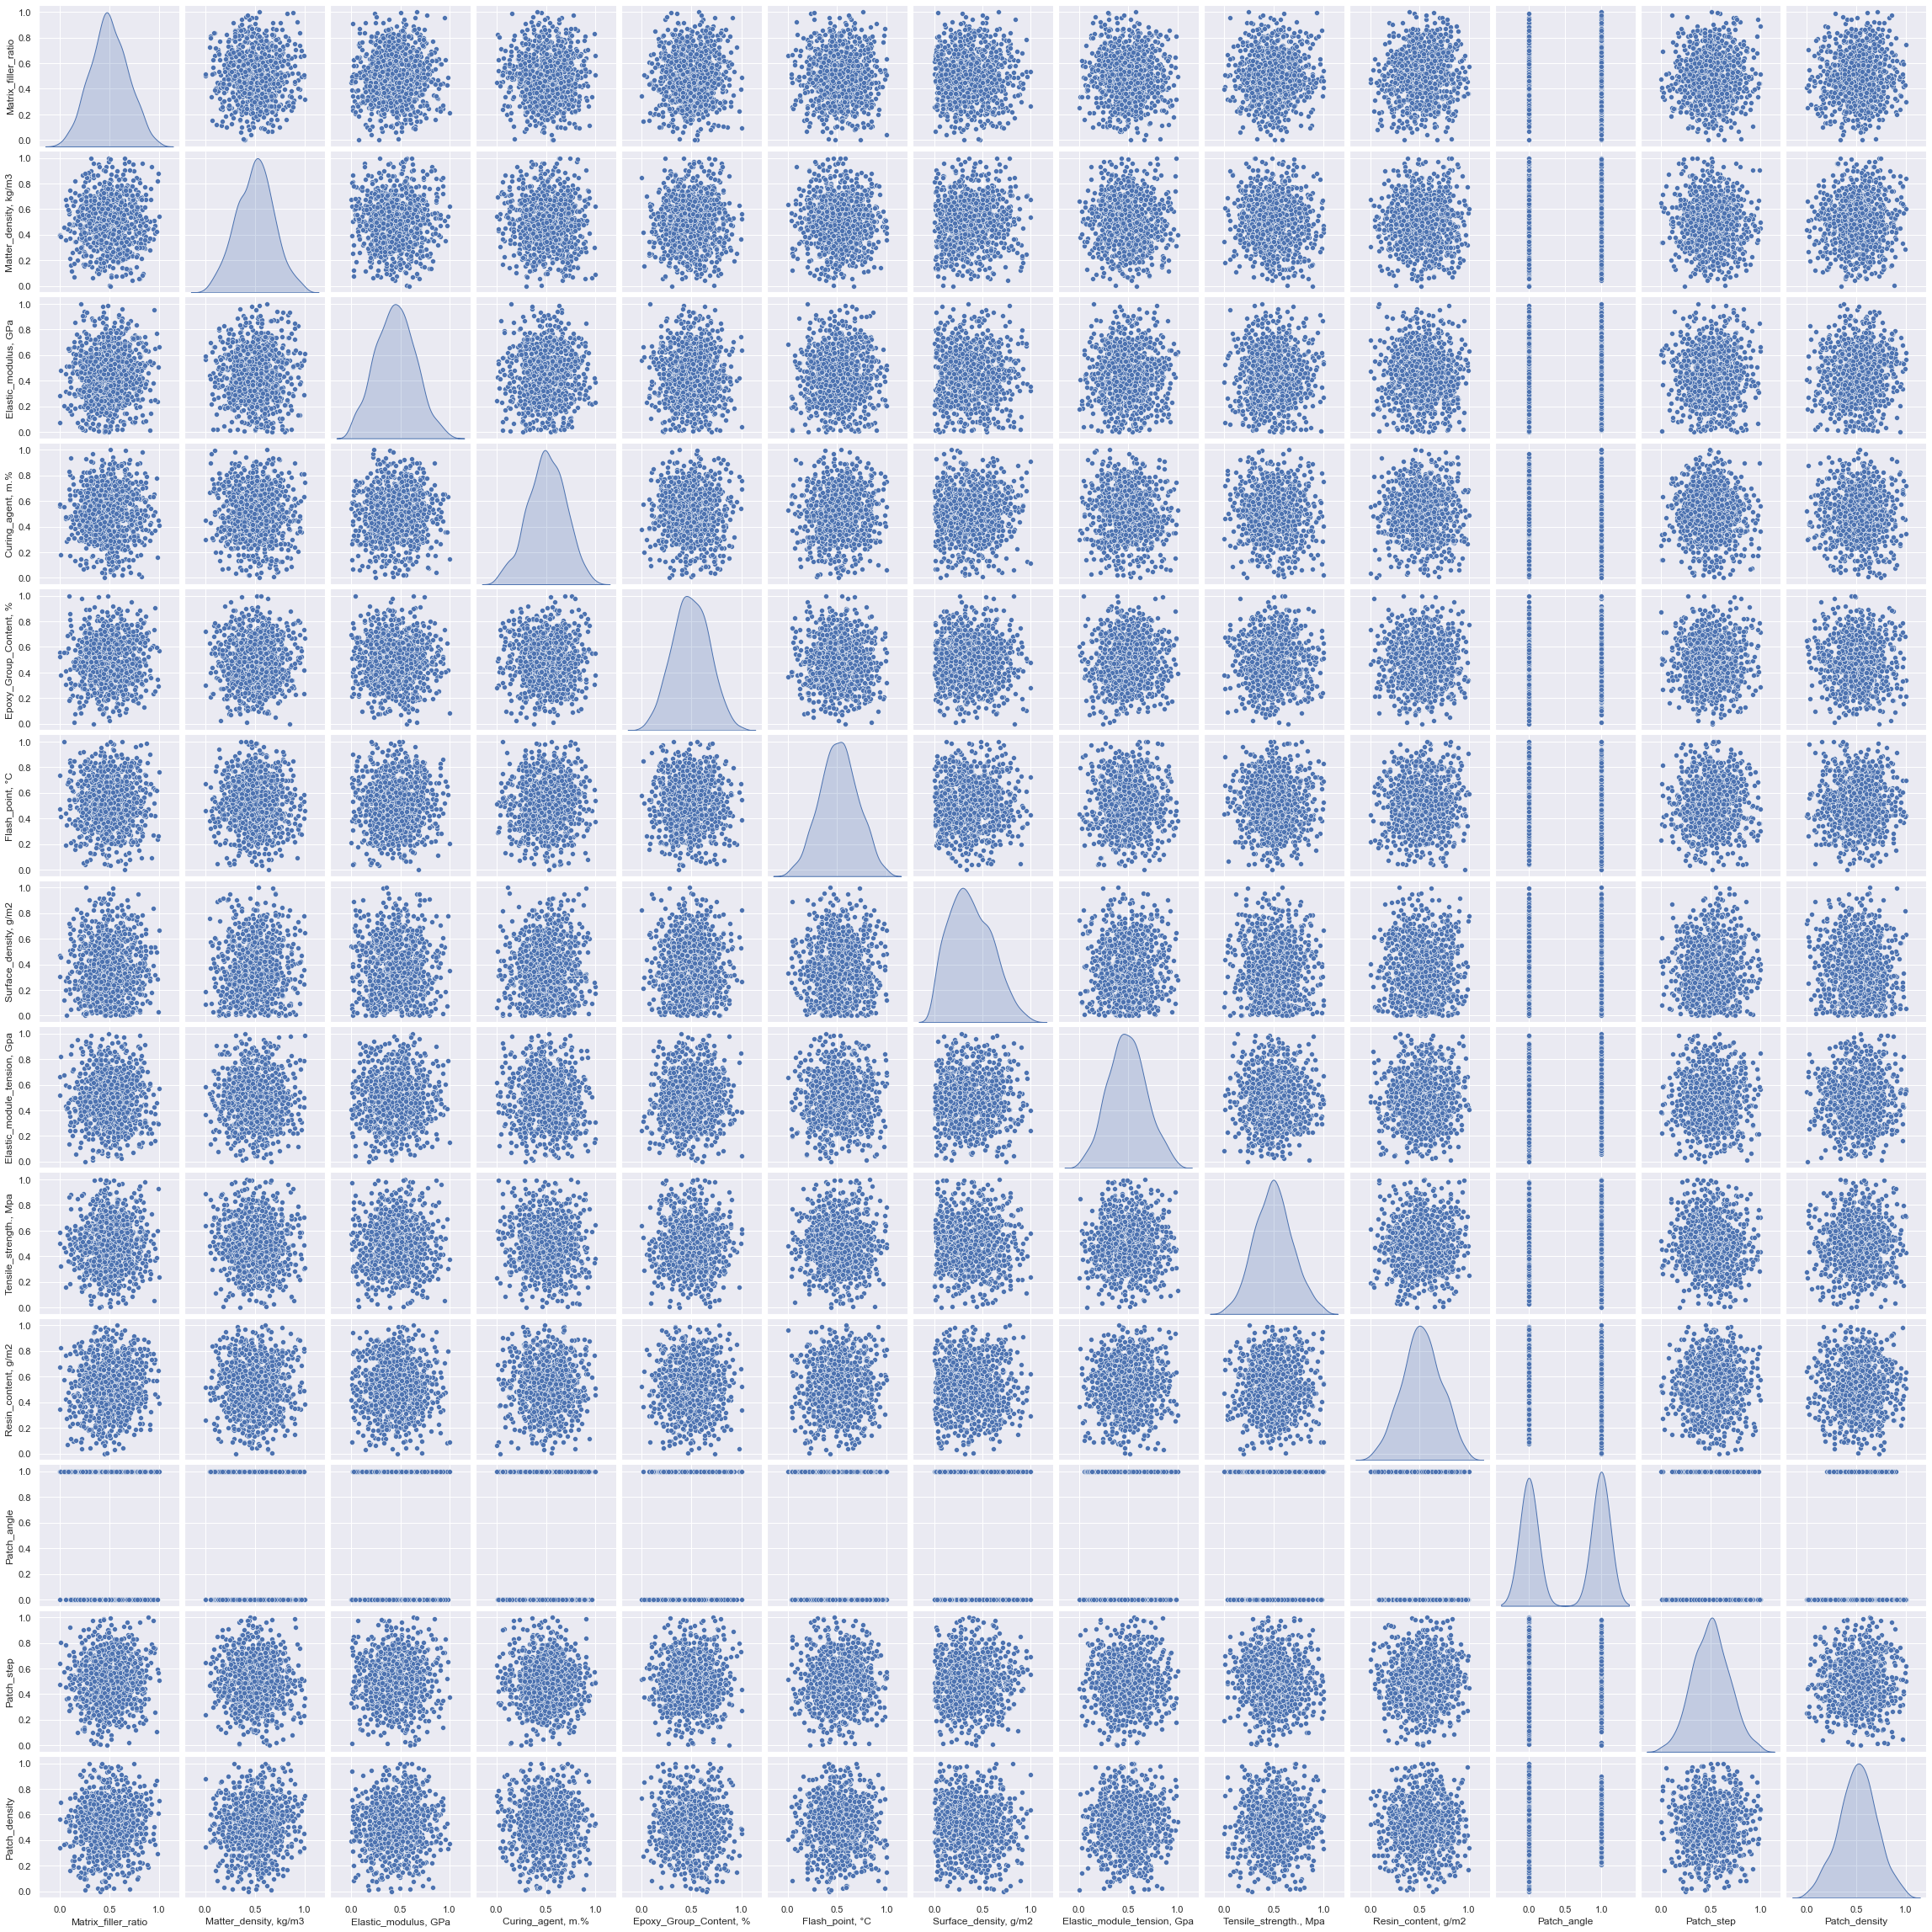

In [32]:
sns.pairplot(df_minmax, diag_kind='kde')

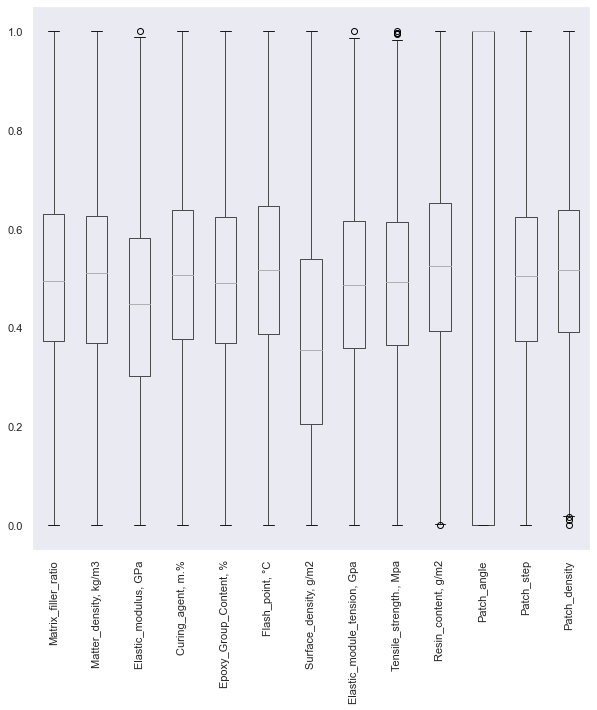

In [33]:
df_minmax.boxplot(figsize = (10, 10), grid=False, rot=90)
plt.show()

# Модели регрессии

In [34]:
#нормализованные данные
df_minmax.columns

Index(['Matrix_filler_ratio', 'Matter_density, kg/m3', 'Elastic_modulus, GPa',
       'Сuring_agent, m.%', 'Epoxy_Group_Content, %', 'Flash_point, °C',
       'Surface_density, g/m2', 'Elastic_module_tension, Gpa',
       'Tensile_strength., Mpa', 'Resin_content, g/m2', 'Patch_angle',
       'Patch_step', 'Patch_density'],
      dtype='object')

**Целевые показатели для моделей регрессии:**
- Elastic_module_at_tension
- Tensile strength

In [35]:
#делим на "входы" и "выходы"
x_in = ['Matrix_filler_ratio','Matter_density, kg/m3', 'Elastic_modulus, GPa',
       'Сuring_agent, m.%', 'Epoxy_Group_Content, %', 'Flash_point, °C',
       'Surface_density, g/m2', 'Resin_content, g/m2', 'Patch_angle',
       'Patch_step', 'Patch_density']
y_out = ['Elastic_module_tension, Gpa',
       'Tensile_strength., Mpa']
df_in = df_minmax[x_in]
df_out = df_minmax[y_out]

In [36]:
df_in.shape

(936, 11)

In [37]:
df_in.head(3)

Matrix_filler_ratio  Matter_density, kg/m3  Elastic_modulus, GPa  \
0             0.274768               0.651097              0.447061   
1             0.274768               0.651097              0.447061   
2             0.466552               0.651097              0.455721   

   Сuring_agent, m.%  Epoxy_Group_Content, %  Flash_point, °C  \
0           0.079153                0.607435         0.509164   
1           0.630983                0.418887         0.583596   
2           0.511257                0.495653         0.509164   

   Surface_density, g/m2  Resin_content, g/m2  Patch_angle  Patch_step  \
0                0.16223             0.529221          0.0    0.289334   
1                0.16223             0.529221          0.0    0.362355   
2                0.16223             0.529221          0.0    0.362355   

   Patch_density  
0       0.557156  
1       0.335840  
2       0.506083

In [38]:
df_out.shape

(936, 2)

In [39]:
df_out.head(3)

Elastic_module_tension, Gpa  Tensile_strength., Mpa
0                     0.280303                 0.71259
1                     0.280303                 0.71259
2                     0.280303                 0.71259

**Линейная регрессия**

In [40]:
#делим выборку на обучающую (70%) и тестовую (30%)
X_train, X_test, y_train, y_test = train_test_split(df_in, df_out, test_size=0.3, random_state=1)

**Создадим модель, которая всегда предсказывает среднее**

In [41]:
#списки для записи результатов
score_mean ={}
mae_mean={}
mse_mean={}

In [42]:
#создаем "среднюю" модель
for i in range(y_test.shape[1]):
    def mean_model(y_test):
        return [np.mean(y_test[y_out[i]]) for _ in range(len(y_test[y_out[i]]))]
    y_pred_mean=mean_model(y_test)
    score_mean['R2_mean_y%s'%str(i+1)] = metrics.r2_score(y_test[y_out[i]], y_pred_mean)
    mae_mean['Mae_mean_y%s'%str(i+1)] = metrics.mean_absolute_error(y_test[y_out[i]], y_pred_mean)
    mse_mean['Mse_mean_y%s'%str(i+1)] = metrics.mean_squared_error(y_test[y_out[i]], y_pred_mean)
print("R2_mean:", score_mean)
print("MAE_mean:",mae_mean)
print("MSE_mean:", mse_mean)

R2_mean: {'R2_mean_y1': 0.0, 'R2_mean_y2': 0.0}
MAE_mean: {'Mae_mean_y1': 0.15862890030602714, 'Mae_mean_y2': 0.1488040656405075}
MSE_mean: {'Mse_mean_y1': 0.03717418269846959, 'Mse_mean_y2': 0.03433880476959935}


**Модель линейной регрессии**

In [43]:
#создаем модель линеной регрессии и списки для записи результатов
model_lr = LinearRegression()
score_train_lr={}
score_lr ={}
mae_lr={}
mse_lr={}

In [44]:
for i in range(y_train.shape[1]):
    model_lr.fit(X_train, y_train[y_out[i]])
    y_train_lr = model_lr.predict(X_train)
    y_pred_lr = model_lr.predict(X_test)
    score_train_lr['R2_train_y%s'%str(i+1)] = metrics.r2_score(y_train[y_out[i]], y_train_lr)
    score_lr['R2_y%s'%str(i+1)] = metrics.r2_score(y_test[y_out[i]], y_pred_lr)
    mae_lr['Mae_y%s'%str(i+1)] = metrics.mean_absolute_error(y_test[y_out[i]], y_pred_lr)
    mse_lr['MSE_y%s'%str(i+1)] = metrics.mean_squared_error(y_test[y_out[i]], y_pred_lr)
print ("R2_train_lr:", score_train_lr)
print("R2_lr:", score_lr)
print("MAE_lr:",mae_lr)
print("MSE_lr:", mse_lr)

R2_train_lr: {'R2_train_y1': 0.021099855832543812, 'R2_train_y2': 0.025484538437679283}
R2_lr: {'R2_y1': -0.019301402088411246, 'R2_y2': -0.018288843718546888}
MAE_lr: {'Mae_y1': 0.16046435043402993, 'Mae_y2': 0.15059623096418548}
MSE_lr: {'MSE_y1': 0.03789169654604081, 'MSE_y2': 0.034966821803512245}


**Т.к. данные нормализованы, можно провести анализ значимости входных переменных на основе соответствующих им коэффициентов уравнения линейной регрессии**

In [45]:
#Важность параметров
importances = np.ravel(model_lr.coef_)
#вывод параметров
feature_list = list(X_train.columns)
#таблица для вывода результатов
feature_results = pd.DataFrame({'Features': feature_list,'Importance': importances})
#сортировка
feature_results = feature_results.sort_values('Importance',ascending = False).reset_index(drop=True)
feature_results

Features  Importance
0      Matrix_filler_ratio    0.064576
1     Elastic_modulus, GPa    0.034850
2            Patch_density    0.019225
3          Flash_point, °C    0.015744
4              Patch_angle    0.010679
5      Resin_content, g/m2   -0.005747
6   Epoxy_Group_Content, %   -0.012418
7    Surface_density, g/m2   -0.025259
8        Сuring_agent, m.%   -0.068005
9    Matter_density, kg/m3   -0.083858
10              Patch_step   -0.097061

**Анализируя результаты в таблице можно предположить, что входная величина *Resin_content* мало влияет на значение выходной. Это подтверждается значением соответствующего коэффициента в уравнении линейной регрессии, т.к. он меньше других на порядок**

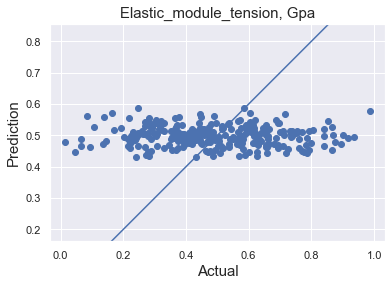

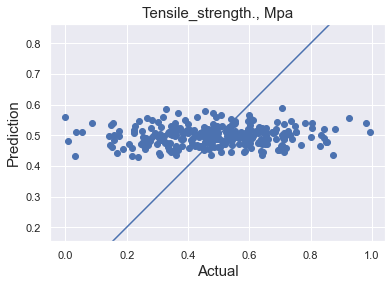

In [46]:
#график соотнесения предсказания с реальным значением
for i in range(y_test.shape[1]):
    plt.scatter(y_test[y_out[i]], y_pred_lr)
    plt.xlabel('Actual',fontsize=15)
    plt.ylabel('Prediction',fontsize=15)
    plt.axis('equal')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.title(label=y_out[i],fontsize=15)
    plt.show()

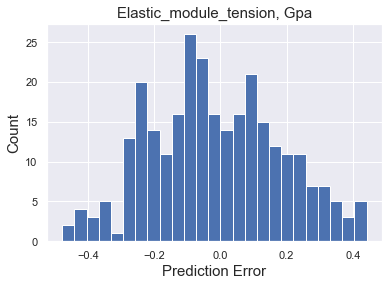

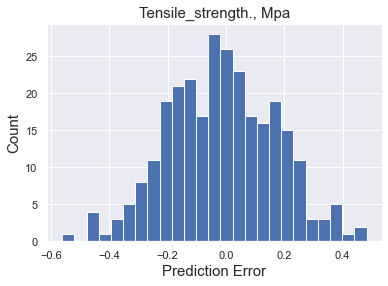

In [47]:
#гистограмма ошибок
for i in range(y_test.shape[1]):
    error_lr = (y_test[y_out[i]] - y_pred_lr)
    plt.hist(error_lr, bins=25)
    plt.xlabel('Prediction Error',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.title(label=y_out[i],fontsize=15)
    plt.show()

**К-ближайших соседей**

Выполним поиск гиперпараметров с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10

In [48]:
#Выполним поиск гиперпараметров с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
knn = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors': range (1, 200, 2),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree'],
}
GSCV_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=10, scoring = 'r2', verbose=2)
GSCV_knn.fit(X_train, y_train)
GSCV_knn.best_params_ 

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=1, 

{'algorithm': 'auto', 'n_neighbors': 47, 'weights': 'uniform'}

In [49]:
#выводим лучшие параметры, подобранные по сетке
model_knn=KNeighborsRegressor(GSCV_knn.best_params_)
model_knn

KNeighborsRegressor(n_neighbors={'algorithm': 'auto', 'n_neighbors': 47,
                                 'weights': 'uniform'})

In [50]:
#формируем модель с подобранными парметрами
model_knn = KNeighborsRegressor(algorithm='auto', n_neighbors=47, weights='uniform')
score_train_knn={}
score_knn ={}
mae_knn={}
mse_knn={}

In [51]:
for i in range(y_train.shape[1]):
    model_knn.fit(X_train, y_train[y_out[i]])
    y_train_knn = model_knn.predict(X_train)
    y_pred_knn = model_knn.predict(X_test)
    score_train_knn['R2_train_y%s'%str(i+1)] = metrics.r2_score(y_train[y_out[i]], y_train_knn)
    score_knn['R2_y%s'%str(i+1)] = metrics.r2_score(y_test[y_out[i]], y_pred_knn)
    mae_knn['Mae_y%s'%str(i+1)] = metrics.mean_absolute_error(y_test[y_out[i]], y_pred_knn)
    mse_knn['MSE_y%s'%str(i+1)] = metrics.mean_squared_error(y_test[y_out[i]], y_pred_knn)
print ("R2_train_knn:", score_train_knn)
print("R2_knn:", score_knn)
print("MAE_knn:",mae_knn)
print("MSE_knn:", mse_knn)

R2_train_knn: {'R2_train_y1': 0.036541101330254566, 'R2_train_y2': 0.04416209780592972}
R2_knn: {'R2_y1': -0.022838949517617557, 'R2_y2': -0.03941079026056582}
MAE_knn: {'Mae_y1': 0.16213822298996336, 'Mae_y2': 0.15174920246711898}
MSE_knn: {'MSE_y1': 0.03802320198047862, 'MSE_y2': 0.03569212420217255}


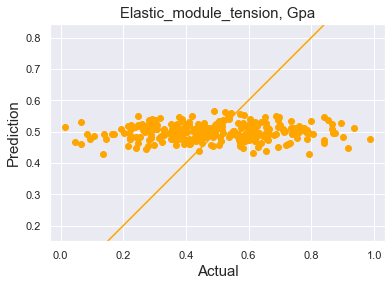

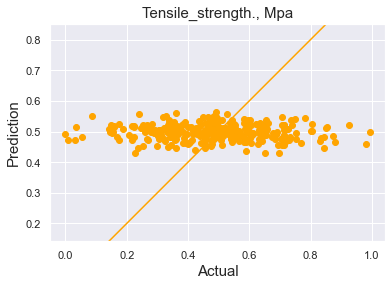

In [52]:
for i in range(y_test.shape[1]):
    plt.scatter(y_test[y_out[i]], y_pred_knn, color ='orange')
    plt.xlabel('Actual',fontsize=15)
    plt.ylabel('Prediction',fontsize=15)
    plt.axis('equal')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100], color ='orange')
    plt.title(label=y_out[i],fontsize=15)
    plt.show()

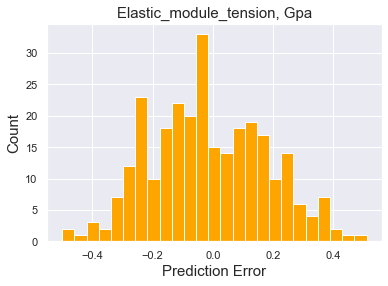

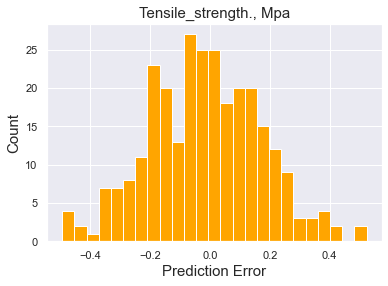

In [53]:
for i in range(y_test.shape[1]):
    error_knn = (y_test[y_out[i]] - y_pred_knn)
    plt.hist(error_knn, bins=25, color ='orange')
    plt.xlabel('Prediction Error',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.title(label=y_out[i],fontsize=15)
    plt.show()

**Дерево решений**

In [54]:
#поиск гиперпараметров
dt = DecisionTreeRegressor()
param_grid_dt = {
    'max_depth': range (1, 200, 2),
    'max_features' : ['auto', 'sqrt', 'log2'],
}
GSCV_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=10, verbose=2)
GSCV_dt.fit(X_train, y_train)
GSCV_dt.best_params_ 

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
[CV] END .....................max_depth=1, max_features=auto; total time=   0.0s
[CV] END .....................max_depth=1, max_features=auto; total time=   0.0s
[CV] END .....................max_depth=1, max_features=auto; total time=   0.0s
[CV] END .....................max_depth=1, max_features=auto; total time=   0.0s
[CV] END .....................max_depth=1, max_features=auto; total time=   0.0s
[CV] END .....................max_depth=1, max_features=auto; total time=   0.0s
[CV] END .....................max_depth=1, max_features=auto; total time=   0.0s
[CV] END .....................max_depth=1, max_features=auto; total time=   0.0s
[CV] END .....................max_depth=1, max_features=auto; total time=   0.0s
[CV] END .....................max_depth=1, max_features=auto; total time=   0.0s
[CV] END .....................max_depth=1, max_features=sqrt; total time=   0.0s
[CV] END .....................max_depth=1, m

{'max_depth': 1, 'max_features': 'log2'}

In [55]:
model_dt=DecisionTreeRegressor(max_depth=1, max_features='log2', random_state=0)
score_train_dt={}
score_dt={}
mae_dt={}
mse_dt={}

In [56]:
for i in range(y_train.shape[1]):
    model_dt.fit(X_train, y_train[y_out[i]])
    y_train_dt = model_dt.predict(X_train)
    y_pred_dt = model_dt.predict(X_test)
    score_train_dt['R2_train_y%s'%str(i+1)] = metrics.r2_score(y_train[y_out[i]], y_train_dt)
    score_dt['R2_y%s'%str(i+1)] = metrics.r2_score(y_test[y_out[i]], y_pred_dt)
    mae_dt['Mae_y%s'%str(i+1)] = metrics.mean_absolute_error(y_test[y_out[i]], y_pred_dt)
    mse_dt['MSE_y%s'%str(i+1)] = metrics.mean_squared_error(y_test[y_out[i]], y_pred_dt)
print ("R2_train_dt:", score_train_dt)
print("R2_dt:", score_dt)
print("MAE_dt:",mae_dt)
print("MSE_dt:", mse_dt)

R2_train_dt: {'R2_train_y1': 0.015193131405598748, 'R2_train_y2': 0.008637914760544652}
R2_dt: {'R2_y1': -0.019340226687054818, 'R2_y2': -0.025939886319050087}
MAE_dt: {'Mae_y1': 0.16067889863749868, 'Mae_y2': 0.15036304307855683}
MSE_dt: {'MSE_y1': 0.037893139818763986, 'MSE_y2': 0.03522954946165481}


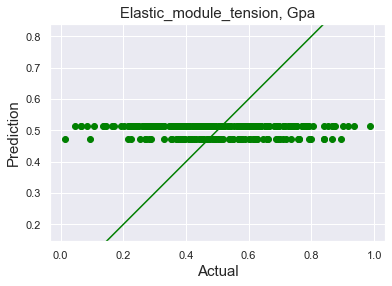

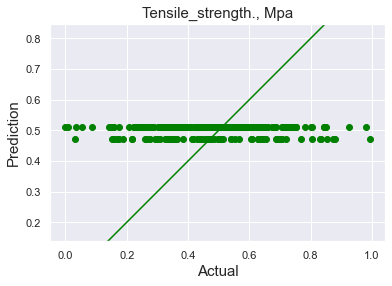

In [57]:
for i in range(y_test.shape[1]):
    plt.scatter(y_test[y_out[i]], y_pred_dt, color ='green')
    plt.xlabel('Actual',fontsize=15)
    plt.ylabel('Prediction',fontsize=15)
    plt.axis('equal')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100], color ='green')
    plt.title(label=y_out[i],fontsize=15)
    plt.show()

**По графикам сопоставления прогнозных и тестовых значений очевидно, что алгоритм Дерево решений сработал, как классификатор при заданных параметрах.
Проверим это, построив гистограммы значений, полученных с помощью модели**

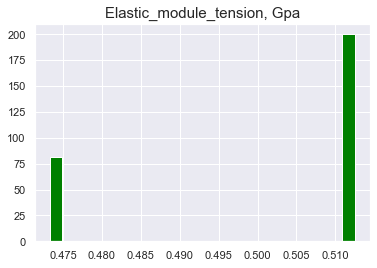

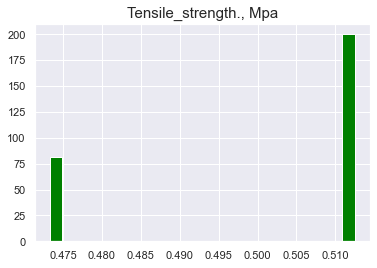

In [58]:
for i in range(y_test.shape[1]):
    plt.hist(y_pred_dt, bins=25, color ='green')
    plt.title(label=y_out[i],fontsize=15)
    plt.show()

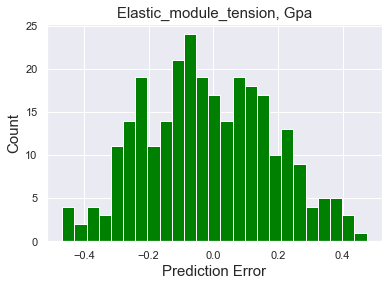

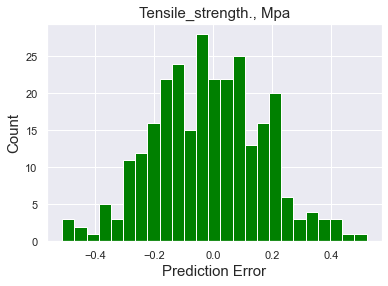

In [59]:
for i in range(y_test.shape[1]):
    error_dt = (y_test[y_out[i]] - y_pred_dt)
    plt.hist(error_dt, bins=25, color ='green')
    plt.xlabel('Prediction Error',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.title(label=y_out[i],fontsize=15)
    plt.show()

**Случайный лес**

In [60]:
rf = RandomForestRegressor(random_state = 42)
param_grid_rf = {
    'n_estimators' : [100, 200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1, 10),
}
GSCV_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=10, verbose=2)
GSCV_rf.fit(X_train, y_train)
GSCV_rf.best_params_ 

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=1, max_features=auto, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=1, max_features=auto, n_

{'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100}

In [64]:
model_rf=RandomForestRegressor(GSCV_rf.best_params_)
model_rf

RandomForestRegressor(n_estimators={'max_depth': 2, 'max_features': 'sqrt',
                                    'n_estimators': 100})

In [65]:
model_rf = RandomForestRegressor(max_depth=2, max_features='sqrt', n_estimators=100, random_state=0)
score_train_rf={}
score_rf ={}
mae_rf={}
mse_rf={}

In [66]:
for i in range(y_train.shape[1]):
    model_rf.fit(X_train, y_train[y_out[i]])
    y_train_rf = model_rf.predict(X_train)
    y_pred_rf = model_rf.predict(X_test)
    score_train_rf['R2_train_y%s'%str(i+1)] = metrics.r2_score(y_train[y_out[i]], y_train_rf)
    score_rf['R2_y%s'%str(i+1)] = metrics.r2_score(y_test[y_out[i]], y_pred_rf)
    mae_rf['Mae_y%s'%str(i+1)] = metrics.mean_absolute_error(y_test[y_out[i]], y_pred_rf)
    mse_rf['MSE_y%s'%str(i+1)] = metrics.mean_squared_error(y_test[y_out[i]], y_pred_rf)
print ("R2_train_rf:", score_train_rf)
print("R2_rf:", score_rf)
print("MAE_rf:",mae_rf)
print("MSE_rf:", mse_rf)

R2_train_rf: {'R2_train_y1': 0.054642208953218474, 'R2_train_y2': 0.05838116380885383}
R2_rf: {'R2_y1': -0.011685391892896746, 'R2_y2': -0.004996676657298416}
MAE_rf: {'Mae_y1': 0.16007457728645916, 'Mae_y2': 0.14977131784130177}
MSE_rf: {'MSE_y1': 0.03760857759159935, 'MSE_y2': 0.034510384673831135}


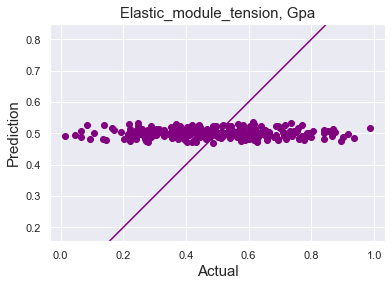

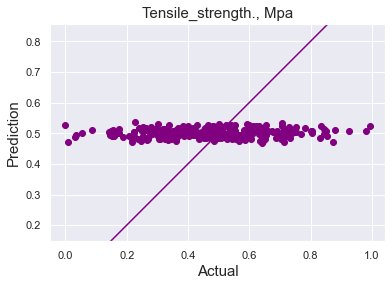

In [67]:
for i in range(y_test.shape[1]):
    plt.scatter(y_test[y_out[i]], y_pred_rf, color ='purple')
    plt.xlabel('Actual', fontsize=15)
    plt.ylabel('Prediction', fontsize=15)
    plt.axis('equal')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100], color ='purple')
    plt.title(label=y_out[i],fontsize=15)
    plt.show()

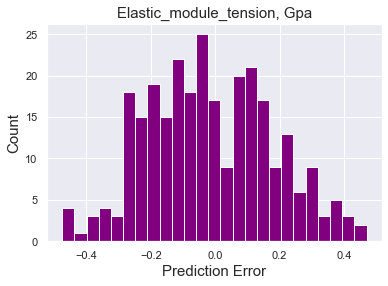

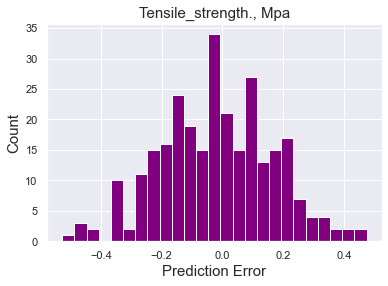

In [68]:
for i in range(y_test.shape[1]):
    error_rf = (y_test[y_out[i]] - y_pred_rf)
    plt.hist(error_rf, bins=25, color ='purple')
    plt.xlabel('Prediction Error', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.title(label=y_out[i],fontsize=15)
    plt.show()

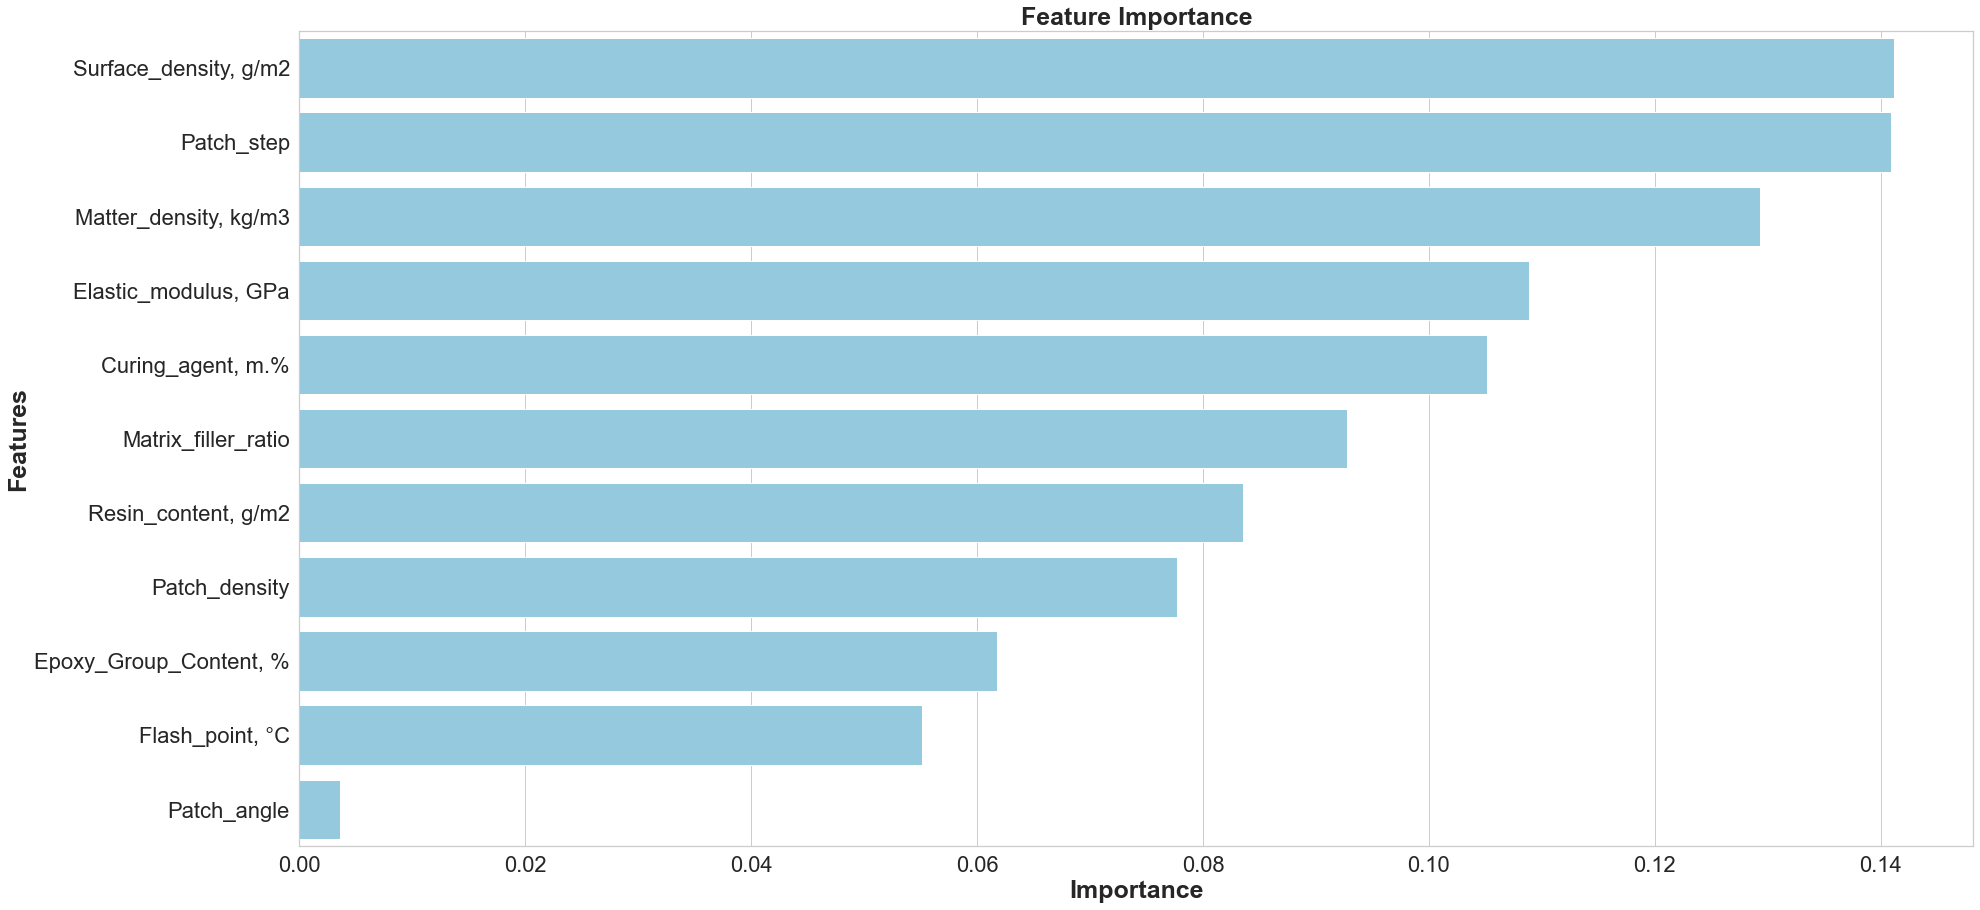

None

Features  Importance
0    Surface_density, g/m2    0.141167
1               Patch_step    0.140909
2    Matter_density, kg/m3    0.129322
3     Elastic_modulus, GPa    0.108906
4        Сuring_agent, m.%    0.105171
5      Matrix_filler_ratio    0.092773
6      Resin_content, g/m2    0.083514
7            Patch_density    0.077691
8   Epoxy_Group_Content, %    0.061805
9          Flash_point, °C    0.055121
10             Patch_angle    0.003621

In [69]:
#попробуем проанализировать "важность" признаков (feature_importances)
rf_feats={}
for feature, importance in zip(df_in.columns, model_rf.feature_importances_):
    rf_feats[feature]=importance
importances = pd.DataFrame.from_dict(rf_feats, orient='index').rename(columns={0:'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale=5)
sns.set(style="whitegrid", color_codes=True, font_scale=2)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

**Последовательный перебор, исключение параметров из входных переменных не дали каких-либо значимых улучшений.
Дополнительно использовались попарные произведения переменных, датасет без удаленных выбросов. Улучшения метрик не произошло**

In [70]:
#вывод результатов моделей
values_score_mean = list(score_mean.values())
values_mae_mean=list(mae_mean.values())
values_mse_mean=list(mse_mean.values())
values_score_lr_train=list(score_train_lr.values())
values_score_lr=list(score_lr.values())
values_mae_lr=list(mae_lr.values())
values_mse_lr=list(mse_lr.values())
values_score_knn_train=list(score_train_knn.values())
values_score_knn=list(score_knn.values())
values_mae_knn=list(mae_knn.values())
values_mse_knn=list(mse_knn.values())
values_score_dt_train=list(score_train_dt.values())
values_score_dt=list(score_dt.values())
values_mae_dt=list(mae_dt.values())
values_mse_dt=list(mse_dt.values())
values_score_rf_train=list(score_train_rf.values())
values_score_rf=list(score_rf.values())
values_mae_rf=list(mae_rf.values())
values_mse_rf=list(mse_rf.values())


In [71]:
results_1= pd.DataFrame([['Mean', '-', round(values_score_mean[0],3), round(values_mae_mean[0],3),
                                 round(values_mse_mean[0],3)],
                              ['LinearRegression',round(values_score_lr_train[0],3), round(values_score_lr[0],3),
                               round(values_mae_lr[0],3),round(values_mse_lr[0],3)],
                              ['KNeighbors',round(values_score_knn_train[0],3),round(values_score_knn[0],3),
                               round(values_mae_knn[0],3), round(values_mse_knn[0],3)],
                               ['DecisionTree', round(values_score_dt_train[0],3), round(values_score_dt[0],3),
                                round(values_mae_dt[0],3),round(values_mse_dt[0],3)],
                               ['RandomForest', round(values_score_rf_train[0],3),round(values_score_rf[0],3),
                                round(values_mae_rf[0],3),round(values_mse_rf[0],3)]],             
columns=['Model','R2_train', 'R2_test', 'MAE', 'MSE'])
print('\n'+'\033[1m' + 'Results for Elastic_module_tension, Gpa'+'\033[0m')
results_1


Results for Elastic_module_tension, Gpa


Model R2_train  R2_test    MAE    MSE
0              Mean        -    0.000  0.159  0.037
1  LinearRegression    0.021   -0.019  0.160  0.038
2        KNeighbors    0.037   -0.023  0.162  0.038
3      DecisionTree    0.015   -0.019  0.161  0.038
4      RandomForest    0.055   -0.012  0.160  0.038

In [72]:
results_2= pd.DataFrame([['Mean', '-', round(values_score_mean[1],3), round(values_mae_mean[1],3),
                                 round(values_mse_mean[1],3)],
                              ['LinearRegression',round(values_score_lr_train[1],3), round(values_score_lr[1],3),
                               round(values_mae_lr[1],3),round(values_mse_lr[1],3)],
                              ['KNeighbors',round(values_score_knn_train[1],3),round(values_score_knn[1],3),
                               round(values_mae_knn[1],3), round(values_mse_knn[1],3)],
                               ['DecisionTree', round(values_score_dt_train[1],3), round(values_score_dt[1],3),
                                round(values_mae_dt[1],3),round(values_mse_dt[1],3)],
                               ['RandomForest', round(values_score_rf_train[1],3),round(values_score_rf[1],3),
                                round(values_mae_rf[1],3),round(values_mse_rf[1],3)]],             
columns=['Model','R2_train', 'R2_test', 'MAE', 'MSE'])
print('\n'+'\033[1m' + 'Tensile_strength., Mpa'+'\033[0m')
results_2


Tensile_strength., Mpa


Model R2_train  R2_test    MAE    MSE
0              Mean        -    0.000  0.149  0.034
1  LinearRegression    0.025   -0.018  0.151  0.035
2        KNeighbors    0.044   -0.039  0.152  0.036
3      DecisionTree    0.009   -0.026  0.150  0.035
4      RandomForest    0.058   -0.005  0.150  0.035

# Нейронные сети

**Нейронная сеть для Elastic_module_tension**

In [73]:
#нормализованный датасет
df_minmax.columns

Index(['Matrix_filler_ratio', 'Matter_density, kg/m3', 'Elastic_modulus, GPa',
       'Сuring_agent, m.%', 'Epoxy_Group_Content, %', 'Flash_point, °C',
       'Surface_density, g/m2', 'Elastic_module_tension, Gpa',
       'Tensile_strength., Mpa', 'Resin_content, g/m2', 'Patch_angle',
       'Patch_step', 'Patch_density'],
      dtype='object')

In [74]:
#сделаем копию
df_em = df_minmax.copy(deep = True)

In [75]:
df_em.columns

Index(['Matrix_filler_ratio', 'Matter_density, kg/m3', 'Elastic_modulus, GPa',
       'Сuring_agent, m.%', 'Epoxy_Group_Content, %', 'Flash_point, °C',
       'Surface_density, g/m2', 'Elastic_module_tension, Gpa',
       'Tensile_strength., Mpa', 'Resin_content, g/m2', 'Patch_angle',
       'Patch_step', 'Patch_density'],
      dtype='object')

In [76]:
X_em = df_em
y_em = X_em.pop('Elastic_module_tension, Gpa')

In [77]:
X_em.shape

(936, 12)

In [78]:
X_em.head(3)

Matrix_filler_ratio  Matter_density, kg/m3  Elastic_modulus, GPa  \
0             0.274768               0.651097              0.447061   
1             0.274768               0.651097              0.447061   
2             0.466552               0.651097              0.455721   

   Сuring_agent, m.%  Epoxy_Group_Content, %  Flash_point, °C  \
0           0.079153                0.607435         0.509164   
1           0.630983                0.418887         0.583596   
2           0.511257                0.495653         0.509164   

   Surface_density, g/m2  Tensile_strength., Mpa  Resin_content, g/m2  \
0                0.16223                 0.71259             0.529221   
1                0.16223                 0.71259             0.529221   
2                0.16223                 0.71259             0.529221   

   Patch_angle  Patch_step  Patch_density  
0          0.0    0.289334       0.557156  
1          0.0    0.362355       0.335840  
2          0.0    0.362355       0.506083

In [79]:
y_em.shape

(936,)

In [80]:
y_em.head(3)

0    0.280303
1    0.280303
2    0.280303
Name: Elastic_module_tension, Gpa, dtype: float64

In [81]:
X_train_em, X_test_em, y_train_em, y_test_em = train_test_split(X_em, y_em, test_size=0.3, random_state=1)

**Строим простую полносвязную нейронную сеть. Выходной слой с одним линейным нейроном — для задачи регрессии. Функция активации: RELU в промежуточном слое и linear в выходном.**

In [249]:
model_em = Sequential()
model_em.add(Dense(64, activation='relu',input_shape=(X_train_em.shape[1],)))
model_em.add(Dense(32, activation='relu'))
model_em.add(Dense(12, activation='relu'))
model_em.add(Dense(1, activation='linear')) # линейная, т.к. пробуем решить задачу регрессии

In [250]:
#архитектура сети
print(model_em.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 64)                832       
                                                                 
 dense_71 (Dense)            (None, 32)                2080      
                                                                 
 dense_72 (Dense)            (None, 12)                396       
                                                                 
 dense_73 (Dense)            (None, 1)                 13        
                                                                 
Total params: 3,321
Trainable params: 3,321
Non-trainable params: 0
_________________________________________________________________
None


In [251]:
#чтобы сравнить модель с результатами моделей из библиотеки sklearn, создадим функцию расчета коэффициента детерминации,
#которую добавим в качестве метрики в нейронную сеть
def coeff_determ(y_true,y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot=K.sum(K.square(y_true-K.mean(y_true)))
    return(1-SS_res/(SS_tot+K.epsilon()))

In [252]:
# используем функцию ошибки mae.
# В качестве метрики берем coeff_determ, оптимайзер Adam
model_em.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mae', metrics=[coeff_determ])

In [253]:
history_em = model_em.fit(X_train_em,
                          y_train_em,
                          epochs=25,
                          validation_split=0.1,
                          verbose=2)

Epoch 1/25
19/19 - 1s - loss: 0.2483 - coeff_determ: -1.7291e+00 - val_loss: 0.1632 - val_coeff_determ: 0.1369 - 1s/epoch - 54ms/step
Epoch 2/25
19/19 - 0s - loss: 0.1595 - coeff_determ: -1.6303e-01 - val_loss: 0.1642 - val_coeff_determ: -3.7673e-01 - 73ms/epoch - 4ms/step
Epoch 3/25
19/19 - 0s - loss: 0.1596 - coeff_determ: -1.3509e-01 - val_loss: 0.1501 - val_coeff_determ: 0.1117 - 92ms/epoch - 5ms/step
Epoch 4/25
19/19 - 0s - loss: 0.1558 - coeff_determ: -9.4522e-02 - val_loss: 0.1518 - val_coeff_determ: 0.0547 - 71ms/epoch - 4ms/step
Epoch 5/25
19/19 - 0s - loss: 0.1552 - coeff_determ: -8.8803e-02 - val_loss: 0.1491 - val_coeff_determ: 0.0376 - 72ms/epoch - 4ms/step
Epoch 6/25
19/19 - 0s - loss: 0.1540 - coeff_determ: -6.7612e-02 - val_loss: 0.1520 - val_coeff_determ: -1.2340e-01 - 78ms/epoch - 4ms/step
Epoch 7/25
19/19 - 0s - loss: 0.1522 - coeff_determ: -6.6308e-02 - val_loss: 0.1481 - val_coeff_determ: 0.1801 - 82ms/epoch - 4ms/step
Epoch 8/25
19/19 - 0s - loss: 0.1522 - coeff_d

In [254]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred_em = model_em.predict(X_test_em).flatten()

In [255]:
#считаем абсолютную ошибку
err_em = np.mean(abs(pred_em - y_test_em))
print(err_em)

0.16322391421517032


In [256]:
#срваним ошибку (mae), полученную расчетным путем, с ошибкой, полученной с помощью evaluate
#выводим R2
result_em=model_em.evaluate(X_test_em, y_test_em, verbose=0)
result_em

[0.16322392225265503, -0.08405259996652603]

In [257]:
mae_em=result_em[0]
mae_em

0.16322392225265503

In [258]:
score_em=result_em[1]
score_em

-0.08405259996652603

In [259]:
hist_em = pd.DataFrame(history_em.history)
hist_em['epoch'] = history_em.epoch
hist_em.tail(5)

loss  coeff_determ  val_loss  val_coeff_determ  epoch
20  0.145482      0.001785  0.147089          0.227798     20
21  0.144085      0.027428  0.146606          0.280230     21
22  0.145273      0.013079  0.147013          0.168414     22
23  0.141823      0.034514  0.145614          0.274110     23
24  0.143004      0.032959  0.147641          0.140754     24

In [260]:
y_test_em=np.array(y_test_em)

In [261]:
# Предсказание vs правильный ответ
for i in range(len(pred_em)):
  print("Результат сети: ", round(pred_em[i],2), ", верный ответ: ", 
        round(y_test_em[i],2), ", разница: ", round(pred_em[i] - y_test_em[i],2))

Результат сети:  0.43 , верный ответ:  0.22 , разница:  0.21
Результат сети:  0.51 , верный ответ:  0.66 , разница:  -0.15
Результат сети:  0.53 , верный ответ:  0.39 , разница:  0.14
Результат сети:  0.48 , верный ответ:  0.59 , разница:  -0.1
Результат сети:  0.55 , верный ответ:  0.37 , разница:  0.18
Результат сети:  0.53 , верный ответ:  0.38 , разница:  0.15
Результат сети:  0.46 , верный ответ:  0.29 , разница:  0.17
Результат сети:  0.49 , верный ответ:  0.6 , разница:  -0.12
Результат сети:  0.39 , верный ответ:  0.61 , разница:  -0.22
Результат сети:  0.57 , верный ответ:  0.25 , разница:  0.32
Результат сети:  0.43 , верный ответ:  0.32 , разница:  0.1
Результат сети:  0.41 , верный ответ:  0.72 , разница:  -0.31
Результат сети:  0.54 , верный ответ:  0.31 , разница:  0.23
Результат сети:  0.56 , верный ответ:  0.73 , разница:  -0.18
Результат сети:  0.39 , верный ответ:  0.43 , разница:  -0.04
Результат сети:  0.5 , верный ответ:  0.62 , разница:  -0.12
Результат сети:  0.5

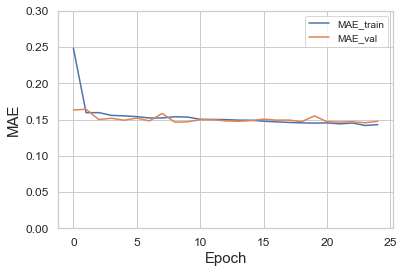

In [262]:
# Отрисовываем графики ошибки
def plot_loss(history_em):
    plt.plot(history_em.history['loss'],
         label='MAE_train')
    plt.plot(history_em.history['val_loss'], 
         label='MAE_val')
    plt.ylim([0, 0.3])
    plt.xlabel('Epoch',fontsize=15)
    plt.ylabel('MAE',fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(fontsize=10)
plot_loss(history_em)

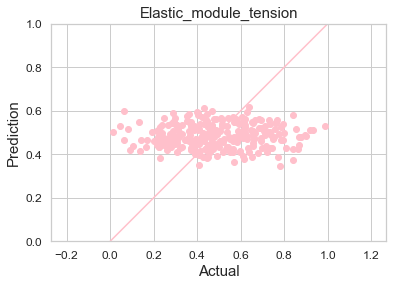

In [263]:
# Разброс предсказаний
plt.scatter(y_test_em, pred_em, color ='pink') 
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Prediction',fontsize=15)
plt.axis('equal')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.plot([-100, 100], [-100, 100], color ='pink')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(label='Elastic_module_tension',fontsize=15)
plt.show()

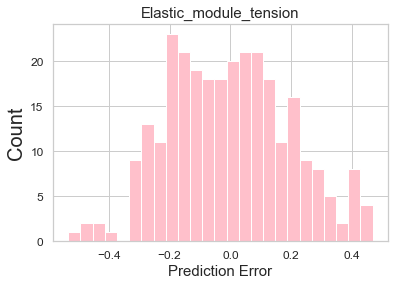

In [264]:
#гистограмма ошибок
error_em = y_test_em - pred_em
plt.hist(error_em, bins=25, color ='pink')
plt.xlabel('Prediction Error',fontsize=15)
plt.ylabel('Count',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(label='Elastic_module_tension',fontsize=15)
plt.show()

**Нейронная сеть для Tensile_strength**

In [265]:
df_minmax.columns

Index(['Matrix_filler_ratio', 'Matter_density, kg/m3', 'Elastic_modulus, GPa',
       'Сuring_agent, m.%', 'Epoxy_Group_Content, %', 'Flash_point, °C',
       'Surface_density, g/m2', 'Elastic_module_tension, Gpa',
       'Tensile_strength., Mpa', 'Resin_content, g/m2', 'Patch_angle',
       'Patch_step', 'Patch_density'],
      dtype='object')

In [266]:
df_ts = df_minmax.copy(deep = True)

In [267]:
df_ts.columns

Index(['Matrix_filler_ratio', 'Matter_density, kg/m3', 'Elastic_modulus, GPa',
       'Сuring_agent, m.%', 'Epoxy_Group_Content, %', 'Flash_point, °C',
       'Surface_density, g/m2', 'Elastic_module_tension, Gpa',
       'Tensile_strength., Mpa', 'Resin_content, g/m2', 'Patch_angle',
       'Patch_step', 'Patch_density'],
      dtype='object')

In [268]:
X_ts = df_ts
y_ts = X_ts.pop('Tensile_strength., Mpa')

In [269]:
X_ts.shape

(936, 12)

In [270]:
X_ts.head(3)

Matrix_filler_ratio  Matter_density, kg/m3  Elastic_modulus, GPa  \
0             0.274768               0.651097              0.447061   
1             0.274768               0.651097              0.447061   
2             0.466552               0.651097              0.455721   

   Сuring_agent, m.%  Epoxy_Group_Content, %  Flash_point, °C  \
0           0.079153                0.607435         0.509164   
1           0.630983                0.418887         0.583596   
2           0.511257                0.495653         0.509164   

   Surface_density, g/m2  Elastic_module_tension, Gpa  Resin_content, g/m2  \
0                0.16223                     0.280303             0.529221   
1                0.16223                     0.280303             0.529221   
2                0.16223                     0.280303             0.529221   

   Patch_angle  Patch_step  Patch_density  
0          0.0    0.289334       0.557156  
1          0.0    0.362355       0.335840  
2          0.0    0.362355       0.506083

In [271]:
y_ts.shape

(936,)

In [272]:
y_ts.head(3)

0    0.71259
1    0.71259
2    0.71259
Name: Tensile_strength., Mpa, dtype: float64

In [273]:
X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(X_ts, y_ts, test_size=0.3, random_state=1)

In [314]:
model_ts = Sequential()
model_ts.add(Dense(64, activation='relu',input_shape=(X_train_ts.shape[1],)))
model_ts.add(Dense(32, activation='relu'))
model_ts.add(Dropout(0.1))
model_ts.add(Dense(12, activation='relu'))
#model_ts.add(Dropout(0.1))
model_ts.add(Dense(1, activation='linear'))

In [315]:
#архитектура модели
print(model_ts.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 64)                832       
                                                                 
 dense_91 (Dense)            (None, 32)                2080      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_92 (Dense)            (None, 12)                396       
                                                                 
 dense_93 (Dense)            (None, 1)                 13        
                                                                 
Total params: 3,321
Trainable params: 3,321
Non-trainable params: 0
_________________________________________________________________
None


In [316]:
model_ts.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mae', metrics=[coeff_determ])

In [317]:
history_ts = model_ts.fit(X_train_ts,
                          y_train_ts,
                          epochs=30,
                          validation_split=0.1,
                          verbose=2)

Epoch 1/30
19/19 - 1s - loss: 0.2901 - coeff_determ: -2.6082e+00 - val_loss: 0.1954 - val_coeff_determ: -8.4350e-01 - 973ms/epoch - 51ms/step
Epoch 2/30
19/19 - 0s - loss: 0.1770 - coeff_determ: -3.9330e-01 - val_loss: 0.1679 - val_coeff_determ: -2.3200e-01 - 85ms/epoch - 4ms/step
Epoch 3/30
19/19 - 0s - loss: 0.1685 - coeff_determ: -3.3255e-01 - val_loss: 0.1576 - val_coeff_determ: -1.4186e-01 - 70ms/epoch - 4ms/step
Epoch 4/30
19/19 - 0s - loss: 0.1598 - coeff_determ: -2.2413e-01 - val_loss: 0.1602 - val_coeff_determ: -1.6595e-01 - 80ms/epoch - 4ms/step
Epoch 5/30
19/19 - 0s - loss: 0.1654 - coeff_determ: -2.6612e-01 - val_loss: 0.1546 - val_coeff_determ: -8.9947e-02 - 80ms/epoch - 4ms/step
Epoch 6/30
19/19 - 0s - loss: 0.1586 - coeff_determ: -1.5918e-01 - val_loss: 0.1558 - val_coeff_determ: -1.0879e-01 - 84ms/epoch - 4ms/step
Epoch 7/30
19/19 - 0s - loss: 0.1576 - coeff_determ: -1.6053e-01 - val_loss: 0.1520 - val_coeff_determ: -8.9972e-02 - 85ms/epoch - 4ms/step
Epoch 8/30
19/19 -

In [318]:
pred_ts = model_ts.predict(X_test_ts).flatten()

In [319]:
err_ts = np.mean(abs(pred_ts - y_test_ts))
print(err_ts)

0.1564519047860646


In [320]:
#срваним ошибку, полученную расчетным путем, с ошибкой, полученной с помощью evaluate
#выводим R2
result_ts=model_ts.evaluate(X_test_ts, y_test_ts, verbose=0)
result_ts

[0.15645189583301544, -0.1135164126753807]

In [321]:
mae_ts=result_ts[0]
mae_ts

0.15645189583301544

In [322]:
score_ts=result_ts[1]
score_ts

-0.1135164126753807

In [323]:
hist_ts = pd.DataFrame(history_ts.history)
hist_ts['epoch'] = history_ts.epoch
hist_ts.tail(5)

loss  coeff_determ  val_loss  val_coeff_determ  epoch
25  0.146285      0.002610  0.154513         -0.023151     25
26  0.145874      0.023553  0.158246          0.022047     26
27  0.148644     -0.050982  0.154227          0.028851     27
28  0.147080     -0.012080  0.153669         -0.039816     28
29  0.144788      0.013375  0.155251          0.037372     29

In [324]:
y_test_ts=np.array(y_test_ts)

In [325]:
# Предсказание vs правильный ответ
for i in range(len(pred_ts)):
  print("Результат сети: ", round(pred_ts[i],2), ", верный ответ: ", 
        round(y_test_ts[i],2), ", разница: ", round(pred_ts[i] - y_test_ts[i],2))

Результат сети:  0.42 , верный ответ:  0.14 , разница:  0.28
Результат сети:  0.53 , верный ответ:  0.16 , разница:  0.37
Результат сети:  0.47 , верный ответ:  0.58 , разница:  -0.12
Результат сети:  0.62 , верный ответ:  0.33 , разница:  0.29
Результат сети:  0.49 , верный ответ:  0.61 , разница:  -0.11
Результат сети:  0.39 , верный ответ:  0.58 , разница:  -0.19
Результат сети:  0.47 , верный ответ:  0.6 , разница:  -0.13
Результат сети:  0.61 , верный ответ:  0.48 , разница:  0.13
Результат сети:  0.51 , верный ответ:  0.37 , разница:  0.13
Результат сети:  0.57 , верный ответ:  0.71 , разница:  -0.14
Результат сети:  0.45 , верный ответ:  0.41 , разница:  0.05
Результат сети:  0.55 , верный ответ:  0.35 , разница:  0.2
Результат сети:  0.54 , верный ответ:  0.34 , разница:  0.2
Результат сети:  0.55 , верный ответ:  0.39 , разница:  0.15
Результат сети:  0.47 , верный ответ:  0.47 , разница:  0.0
Результат сети:  0.53 , верный ответ:  0.39 , разница:  0.14
Результат сети:  0.51 ,

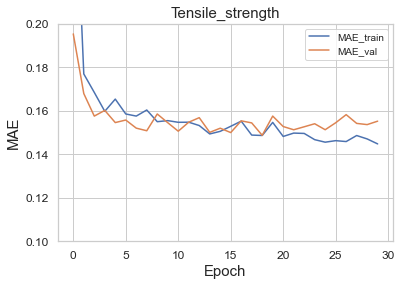

In [326]:
# Считаем графики ошибки
def plot_loss(history_ts):
    plt.plot(history_ts.history['loss'],
         label='MAE_train')
    plt.plot(history_ts.history['val_loss'], 
         label='MAE_val')
    plt.ylim([0.1, 0.2])
    plt.xlabel('Epoch',fontsize=15)
    plt.ylabel('MAE',fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(fontsize=10)
    plt.title(label='Tensile_strength',fontsize=15)
plot_loss(history_ts)

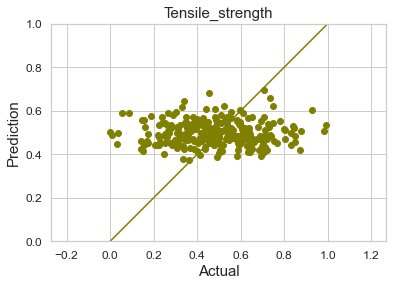

In [327]:
# Разброс предсказаний
plt.scatter(y_test_ts, pred_ts, color ='olive') 
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Prediction',fontsize=15)
plt.axis('equal')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.plot([-100, 100], [-100, 100], color ='olive')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(label='Tensile_strength',fontsize=15)
plt.show()

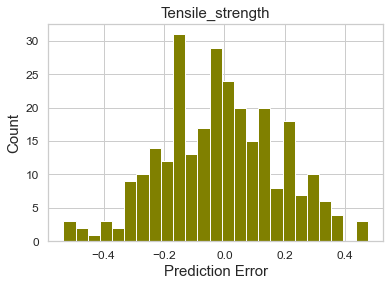

In [328]:
error_ts = y_test_ts - pred_ts
plt.hist(error_ts, bins=25, color ='olive')
plt.xlabel('Prediction Error',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(label='Tensile_strength',fontsize=15)
plt.show()

**Сравнение результатов НС с регрессорами**

In [329]:
results_all_1= pd.DataFrame([['Mean', round(values_score_mean[0],3), round(values_mae_mean[0],3)],
                              ['LinearRegression',round(values_score_lr[0],3), round(values_mae_lr[0],3)],
                              ['KNeighbors',round(values_score_knn[0],3), round(values_mae_knn[0],3)],
                               ['DecisionTree', round(values_score_dt[0],3), round(values_mae_dt[0],3)],
                               ['RandomForest', round(values_score_rf[0],3), round(values_mae_rf[0],3)],
                             ['Neural network', round(score_em,3), round(mae_em,3)]],
columns=['Model', 'R2','MAE'])
print('\n'+'\033[1m' + 'Results for Elastic_module_tension, Gpa'+'\033[0m')
results_all_1


Results for Elastic_module_tension, Gpa


Model     R2    MAE
0              Mean  0.000  0.159
1  LinearRegression -0.019  0.160
2        KNeighbors -0.023  0.162
3      DecisionTree -0.019  0.161
4      RandomForest -0.012  0.160
5    Neural network -0.084  0.163

In [330]:
results_all_2= pd.DataFrame([['Mean', round(values_score_mean[1],3),round(values_mae_mean[1],3)],
                              ['LinearRegression',round(values_score_lr[1],3),round(values_mae_lr[1],3)],
                              ['KNeighbors',round(values_score_knn[1],3),round(values_mae_knn[1],3)],
                               ['DecisionTree',  round(values_score_dt[1],3),round(values_mae_dt[1],3)],
                               ['RandomForest', round(values_score_rf[1],3),round(values_mae_rf[1],3)],
                            ['Neural network', round(score_ts,3), round(mae_ts,3)]],
columns=['Model','R2', 'MAE'])
print('\n'+'\033[1m' + 'Tensile_strength., Mpa'+'\033[0m')
results_all_2


Tensile_strength., Mpa


Model     R2    MAE
0              Mean  0.000  0.149
1  LinearRegression -0.018  0.151
2        KNeighbors -0.039  0.152
3      DecisionTree -0.026  0.150
4      RandomForest -0.005  0.150
5    Neural network -0.114  0.156

# Нейронная сеть для Matrix_filler_ratio

In [152]:
#Начнем работу с датасета, в котором удалены выбросы, но не нормализованы значения
#будем делать нормировку отдельно для X и y, чтобы вернуться к изначальному масштабу для Y после создания модели
df_copy.head(3)

Matrix_filler_ratio  Matter_density, kg/m3  Elastic_modulus, GPa  \
1             1.857143                 2030.0            738.736842   
3             1.857143                 2030.0            738.736842   
4             2.771331                 2030.0            753.000000   

   Сuring_agent, m.%  Epoxy_Group_Content, %  Flash_point, °C  \
1              50.00               23.750000       284.615385   
3             129.00               21.250000       300.000000   
4             111.86               22.267857       284.615385   

   Surface_density, g/m2  Elastic_module_tension, Gpa  Tensile_strength., Mpa  \
1                  210.0                         70.0                  3000.0   
3                  210.0                         70.0                  3000.0   
4                  210.0                         70.0                  3000.0   

   Resin_content, g/m2  Patch_angle  Patch_step  Patch_density  
1                220.0          0.0         4.0           60.0  
3                220.0          0.0         5.0           47.0  
4                220.0          0.0         5.0           57.0

In [153]:
df_nn = df_copy.copy(deep = True)

In [154]:
df_nn.columns

Index(['Matrix_filler_ratio', 'Matter_density, kg/m3', 'Elastic_modulus, GPa',
       'Сuring_agent, m.%', 'Epoxy_Group_Content, %', 'Flash_point, °C',
       'Surface_density, g/m2', 'Elastic_module_tension, Gpa',
       'Tensile_strength., Mpa', 'Resin_content, g/m2', 'Patch_angle',
       'Patch_step', 'Patch_density'],
      dtype='object')

In [155]:
X_nn = df_nn
y_nn = X_nn.pop('Matrix_filler_ratio')

In [156]:
#делим выборку на тренировочно-валидационную и на тестовую с помощью функции  train_test_split, тестовая = 30%
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.3, random_state=1)

**Нормировка для Х**

In [157]:
#при нормировке среднее арифметическое вычитается из исходных данных,
#чтобы новые значения лежали равномернее относительно оси х
#найдем среднее для Х_train
mean = X_train_nn.mean(axis=0)

In [158]:
X_train_nn.describe().T

count         mean         std          min  \
Matter_density, kg/m3        655.0  1969.639280   69.225159  1784.482245   
Elastic_modulus, GPa         655.0   744.749903  328.352969     2.436909   
Сuring_agent, m.%            655.0   111.162924   27.350770    40.304806   
Epoxy_Group_Content, %       655.0    22.150428    2.410315    15.695894   
Flash_point, °C              655.0   284.904336   39.945587   179.374391   
Surface_density, g/m2        655.0   488.052595  280.316189     0.603740   
Elastic_module_tension, Gpa  655.0    73.330007    3.027861    65.553336   
Tensile_strength., Mpa       655.0  2481.261683  466.915995  1264.310682   
Resin_content, g/m2          655.0   218.079720   58.752548    63.685698   
Patch_angle                  655.0    45.068702   45.034338     0.000000   
Patch_step                   655.0     6.843707    2.467337     0.037639   
Patch_density                655.0    57.426515   11.355594    27.272928   

                                     25%          50%          75%  \
Matter_density, kg/m3        1920.025656  1969.874456  2014.763898   
Elastic_modulus, GPa          507.712870   747.004366   964.964385   
Сuring_agent, m.%              92.475643   110.979100   130.164546   
Epoxy_Group_Content, %         20.576246    22.178914    23.901787   
Flash_point, °C               257.670697   284.615385   312.885525   
Surface_density, g/m2         267.682672   465.201284   696.445227   
Elastic_module_tension, Gpa    71.299517    73.385782    75.217276   
Tensile_strength., Mpa       2170.283469  2465.020916  2759.904245   
Resin_content, g/m2           179.442784   216.784939   258.256578   
Patch_angle                     0.000000    90.000000    90.000000   
Patch_step                      5.098250     6.916144     8.498579   
Patch_density                  50.184371    57.557283    64.826860   

                                     max  
Matter_density, kg/m3        2161.565216  
Elastic_modulus, GPa         1649.415706  
Сuring_agent, m.%             181.828448  
Epoxy_Group_Content, %         28.955094  
Flash_point, °C               386.067992  
Surface_density, g/m2        1291.340115  
Elastic_module_tension, Gpa    81.417126  
Tensile_strength., Mpa       3705.672523  
Resin_content, g/m2           356.925975  
Patch_angle                    90.000000  
Patch_step                     13.732404  
Patch_density                  86.012427

In [159]:
#распространено деление полученных данных на стандартное отклонение (стандартизация), 
#т.к.приближая значения данных к диапазону функций активации, ускоряется корректировка весов и сеть быстрее сходится.
#найдем стандартное отклонение по Х_train
std = X_train_nn.std(axis=0)

In [160]:
#поскольку нормализацию нужно проделать и для обучающей, и для проверочной выборки,
#воспользуемся функцией 
def norm(x):
  return (x - mean)/ std
X_train_nn = norm(X_train_nn);
X_test_nn = norm(X_test_nn);

In [161]:
#проверим, что мат.ожидание = 0, стандартное отклонение = 1
X_train_nn.describe().T

count          mean  std       min       25%  \
Matter_density, kg/m3        655.0  9.546223e-16  1.0 -2.674707 -0.716699   
Elastic_modulus, GPa         655.0  1.681437e-16  1.0 -2.260717 -0.721897   
Сuring_agent, m.%            655.0 -1.735677e-16  1.0 -2.590718 -0.683245   
Epoxy_Group_Content, %       655.0 -1.518717e-16  1.0 -2.677879 -0.653102   
Flash_point, °C              655.0 -7.946146e-16  1.0 -2.641842 -0.681768   
Surface_density, g/m2        655.0  2.440796e-17  1.0 -1.738925 -0.786148   
Elastic_module_tension, Gpa  655.0 -6.590148e-16  1.0 -2.568371 -0.670602   
Tensile_strength., Mpa       655.0 -1.437357e-16  1.0 -2.606360 -0.666026   
Resin_content, g/m2          655.0  2.711995e-18  1.0 -2.627869 -0.657621   
Patch_angle                  655.0 -2.847595e-17  1.0 -1.000763 -1.000763   
Patch_step                   655.0 -3.796793e-17  1.0 -2.758467 -0.707426   
Patch_density                655.0  8.597025e-16  1.0 -2.655395 -0.637760   

                                  50%       75%       max  
Matter_density, kg/m3        0.003397  0.651853  2.772488  
Elastic_modulus, GPa         0.006866  0.670664  2.755163  
Сuring_agent, m.%           -0.006721  0.694738  2.583676  
Epoxy_Group_Content, %       0.011819  0.726610  2.823144  
Flash_point, °C             -0.007234  0.700483  2.532536  
Surface_density, g/m2       -0.081520  0.743420  2.865648  
Elastic_module_tension, Gpa  0.018421  0.623301  2.670901  
Tensile_strength., Mpa      -0.034783  0.596772  2.622336  
Resin_content, g/m2         -0.022038  0.683832  2.363238  
Patch_angle                  0.997712  0.997712  0.997712  
Patch_step                   0.029358  0.670712  2.791957  
Patch_density                0.011516  0.651692  2.517342

Нормировка для Y

Чтобы привести величины в выборке к 1, разделим данные на значение амплитуды, взятое от новой (смещенной) выборки. Сохраняем минимальные и максимальные значения, поскольку после получения результатов на выходе сети, нужно будет выполнить обратную процедуру.

При корректировке данных тестовой выборки воспользуемся полученным максимальным значением амплитуды от обучающей выборки: 

In [162]:
# Приводим значения ответов в диапазон от 0 до 1
min_y = y_train_nn.min()
#"опустим" максимум на min_y
max_y = y_train_nn.max() - min_y
#отклонение от минимума к амплитуде
y_train_nn = (y_train_nn - min_y) / max_y
y_test_nn = (y_test_nn - min_y) / max_y

Обучающая, и проверочная выборка нормируется статистикой, полученной по обучающей выборке.

Использование статистики обучающей выборки при нормализации тестовой позволяет выявлять ошибки тестовой выборки, если её статистика отличается от обучающей. 

После тренировки сети на обучающей выборке её веса будут подобраны таким образом, чтобы минимизировать ошибку. Сеть настроена на статистику обучающей выборки. Затем на сеть подается проверочная выборка, отнормированная статистикой обучающей. Сеть выдаст на выходе некоторый результат, который будет денормализован опять же с использованием статистики обучающей выборки. Если данные в проверочной выборке отличаются, то денормализация статистикой обучающей выборки приведет к росту ошибки.



Строим простую полносвязную нейронную сеть. Выходной слой с одним линейным нейроном — для задачи регрессии. Функция активации — RELU в промежуточном слое и linear в выходном.

In [230]:
model_nn = Sequential()
model_nn.add(Dense(128, activation='relu',input_shape=(X_train_nn.shape[1],)))
#model_nn.add(BatchNormalization())
model_nn.add(Dense(64, activation='relu'))
#model_nn.add(BatchNormalization())
model_nn.add(Dense(64, activation='relu'))
model_nn.add(BatchNormalization())
#model_nn.add(Dropout(0.1))
#model_nn.add(Dense(32, activation='relu'))
#model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.1))
model_nn.add(Dense(32, activation='relu'))
#model_nn.add(BatchNormalization())
#model_nn.add(Dropout(0.1))
model_nn.add(Dense(12, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

In [231]:
#архитектура модели
print(model_nn.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 128)               1664      
                                                                 
 dense_65 (Dense)            (None, 64)                8256      
                                                                 
 dense_66 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_67 (Dense)            (None, 32)                2080      
                                                     

In [232]:
# задача регрессии, используем mse в качестве функции потерь
# В качестве метрики берем mae
model_nn.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mse', metrics=['mae'])

In [233]:
history = model_nn.fit(X_train_nn, 
                    y_train_nn, 
                    epochs=70,
                    #batch_size = 20,
                    #callbacks = [callback_nn],
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/70
19/19 - 1s - loss: 0.3021 - mae: 0.4259 - val_loss: 0.1989 - val_mae: 0.4066 - 1s/epoch - 70ms/step
Epoch 2/70
19/19 - 0s - loss: 0.1366 - mae: 0.2922 - val_loss: 0.2153 - val_mae: 0.4274 - 100ms/epoch - 5ms/step
Epoch 3/70
19/19 - 0s - loss: 0.0873 - mae: 0.2306 - val_loss: 0.2015 - val_mae: 0.4119 - 100ms/epoch - 5ms/step
Epoch 4/70
19/19 - 0s - loss: 0.0758 - mae: 0.2198 - val_loss: 0.1982 - val_mae: 0.4065 - 93ms/epoch - 5ms/step
Epoch 5/70
19/19 - 0s - loss: 0.0625 - mae: 0.1952 - val_loss: 0.2034 - val_mae: 0.4145 - 95ms/epoch - 5ms/step
Epoch 6/70
19/19 - 0s - loss: 0.0562 - mae: 0.1899 - val_loss: 0.1834 - val_mae: 0.3889 - 92ms/epoch - 5ms/step
Epoch 7/70
19/19 - 0s - loss: 0.0522 - mae: 0.1817 - val_loss: 0.1795 - val_mae: 0.3855 - 89ms/epoch - 5ms/step
Epoch 8/70
19/19 - 0s - loss: 0.0427 - mae: 0.1648 - val_loss: 0.1650 - val_mae: 0.3652 - 100ms/epoch - 5ms/step
Epoch 9/70
19/19 - 0s - loss: 0.0392 - mae: 0.1556 - val_loss: 0.1513 - val_mae: 0.3468 - 101ms/epoch 

In [234]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred_nn = model_nn.predict(X_test_nn).flatten()

In [235]:
#считаем абсолютныю ошибку на норм.данных
err_norm = np.mean(abs(pred_nn - y_test_nn))
print(err_norm)

0.181901124457393


In [236]:
# проверим
model_nn.evaluate(X_test_nn, y_test_nn, verbose=0)

[0.04929213598370552, 0.18190111219882965]

In [237]:
hist_nn = pd.DataFrame(history.history)
hist_nn['epoch'] = history.epoch
hist_nn.tail(5)

loss       mae  val_loss   val_mae  epoch
65  0.009868  0.078718  0.042403  0.168718     65
66  0.009830  0.079382  0.041764  0.166015     66
67  0.009780  0.077575  0.041077  0.165040     67
68  0.007917  0.070571  0.042271  0.165769     68
69  0.008809  0.073428  0.042210  0.166373     69

In [238]:
y_test_nn=np.array(y_test_nn)

In [239]:
# Предсказание vs правильный ответ
for i in range(len(pred_nn)):
  print("Результат сети: ", round(pred_nn[i],2), ", верный ответ: ", 
        round(y_test_nn[i],2), ", разница: ", round(pred_nn[i] - y_test_nn[i],2))

Результат сети:  0.35 , верный ответ:  0.58 , разница:  -0.24
Результат сети:  0.27 , верный ответ:  0.79 , разница:  -0.52
Результат сети:  0.43 , верный ответ:  0.55 , разница:  -0.12
Результат сети:  0.19 , верный ответ:  0.7 , разница:  -0.51
Результат сети:  0.65 , верный ответ:  0.4 , разница:  0.25
Результат сети:  0.25 , верный ответ:  0.46 , разница:  -0.21
Результат сети:  0.48 , верный ответ:  0.57 , разница:  -0.1
Результат сети:  0.35 , верный ответ:  0.84 , разница:  -0.49
Результат сети:  0.31 , верный ответ:  0.44 , разница:  -0.13
Результат сети:  0.51 , верный ответ:  0.48 , разница:  0.03
Результат сети:  0.46 , верный ответ:  0.52 , разница:  -0.06
Результат сети:  0.27 , верный ответ:  0.14 , разница:  0.14
Результат сети:  0.65 , верный ответ:  0.87 , разница:  -0.22
Результат сети:  0.23 , верный ответ:  0.52 , разница:  -0.29
Результат сети:  0.46 , верный ответ:  0.37 , разница:  0.09
Результат сети:  0.42 , верный ответ:  0.63 , разница:  -0.21
Результат сети:

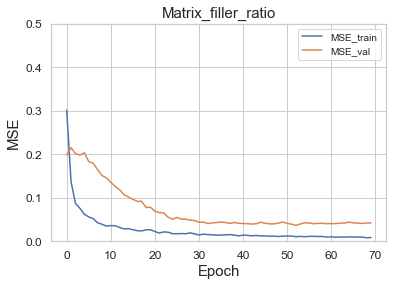

In [240]:
# Отрисовываем графики ошибки
def plot_loss(history):
    plt.plot(history.history['loss'],
         label='MSE_train')
    plt.plot(history.history['val_loss'], 
         label='MSE_val')
    plt.ylim([0, 0.5])
    plt.xlabel('Epoch',fontsize=15)
    plt.ylabel('MSE',fontsize=15)
    plt.legend(fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.title(label='Matrix_filler_ratio',fontsize=15)
plot_loss(history)

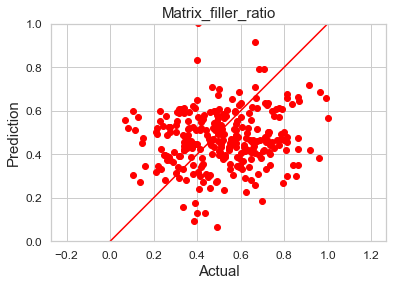

In [241]:
# Разброс предсказаний
plt.scatter(y_test_nn, pred_nn, color ='red') 
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Prediction',fontsize=15)
plt.axis('equal')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.plot([-100, 100], [-100, 100], color ='red')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(label='Matrix_filler_ratio',fontsize=15)
plt.show()

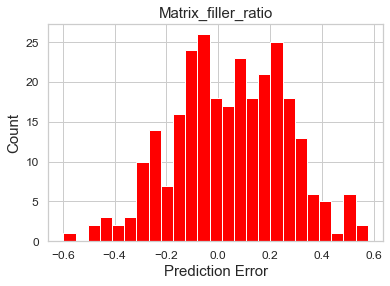

In [242]:
error_nn = y_test_nn - pred_nn
plt.hist(error_nn, bins=25, color ='red')
plt.xlabel('Prediction Error',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(label='Matrix_filler_ratio',fontsize=15)
plt.show()

**Возвращаем Y к первоначальному масштабу. Приводим полученные значения ответов сети к нашим значениям, умножив на max_y (приводим амплитуду к нормальному виду) и «подняв» на min_y**

In [243]:
#Возвращаем к прежнему размеру
pred_nn_cor = pred_nn * max_y + min_y 
y_test_nn_cor = y_test_nn * max_y + min_y

In [244]:
# Считаем абсолютную ошибку
err_cor = np.mean(abs(pred_nn_cor - y_test_nn_cor))
print(err_cor)

0.8637485793531181


In [245]:
y_test_nn_cor=np.array(y_test_nn_cor)

In [246]:
# Предсказание vs правильный ответ
for i in range(len(pred_nn_cor)):
  print("Результат сети: ", round(pred_nn_cor[i],2), ", верный ответ: ", 
        round(y_test_nn_cor[i],2), ", разница: ", round(pred_nn_cor[i] - y_test_nn_cor[i],2))

Результат сети:  2.19 , верный ответ:  3.32 , разница:  -1.13
Результат сети:  1.83 , верный ответ:  4.32 , разница:  -2.49
Результат сети:  2.59 , верный ответ:  3.15 , разница:  -0.56
Результат сети:  1.43 , верный ответ:  3.86 , разница:  -2.43
Результат сети:  3.63 , верный ответ:  2.44 , разница:  1.19
Результат сети:  1.71 , верный ответ:  2.72 , разница:  -1.0
Результат сети:  2.81 , верный ответ:  3.27 , разница:  -0.47
Результат сети:  2.21 , верный ответ:  4.55 , разница:  -2.34
Результат сети:  2.02 , верный ответ:  2.65 , разница:  -0.63
Результат сети:  2.98 , верный ответ:  2.83 , разница:  0.15
Результат сети:  2.75 , верный ответ:  3.01 , разница:  -0.26
Результат сети:  1.85 , верный ответ:  1.19 , разница:  0.66
Результат сети:  3.62 , верный ответ:  4.68 , разница:  -1.06
Результат сети:  1.66 , верный ответ:  3.02 , разница:  -1.36
Результат сети:  2.75 , верный ответ:  2.32 , разница:  0.43
Результат сети:  2.55 , верный ответ:  3.56 , разница:  -1.01
Результат сет

In [331]:
model_nn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 128)               1664      
                                                                 
 dense_65 (Dense)            (None, 64)                8256      
                                                                 
 dense_66 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_67 (Dense)            (None, 32)                2080      
                                                     

In [332]:
model_nn.save('models/nn_model')

INFO:tensorflow:Assets written to: models/nn_model\assets
